In [1]:
# Install Libraries
!pip install missingno
!pip install xgboost
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install bayesian-optimization


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno


**Load & Inspect the Dataset**

In [6]:
# Load dataset
df = pd.read_csv('AE_attendances_england_monthly.csv')

In [8]:
# Display basic information
print(df.info())
display(df.head())  # Shows first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27112 entries, 0 to 27111
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Unnamed: 0                                                                 27112 non-null  int64  
 1   date                                                                       27112 non-null  object 
 2   Name                                                                       27108 non-null  object 
 3   Type 1 Departments - Major A&E                                             27112 non-null  int64  
 4   Type 2 Departments - Single Specialty                                      27112 non-null  float64
 5   Type 3 Departments - Other A&E/Minor Injury Unit                           27112 non-null  int64  
 6   Total attendances                                     

Unnamed: 0        date                                               Name  \
0           0  01/11/2010  Aintree University Hospitals NHS Foundation Trust   
1           1  01/11/2010                                 Airedale NHS Trust   
2           2  01/11/2010          Alder Hey Children’S NHS Foundation Trust   
3           3  01/11/2010         Ashford And St Peter'S Hospitals NHS Trust   
4           4  01/11/2010         Ashton, Leigh And Wigan Primary Care Trust   

   Type 1 Departments - Major A&E  Type 2 Departments - Single Specialty  \
0                            4622                                    0.0   
1                            3965                                    0.0   
2                            4541                                    0.0   
3                            7010                                    0.0   
4                               0                                    0.0   

   Type 3 Departments - Other A&E/Minor Injury Unit  Total attendances  \
0                                                 0             4622.0   
1                                                 0             3965.0   
2                                                 0             4541.0   
3                                               769             7779.0   
4                                              4297             4297.0   

   Type 1 Departments - 4 hours to decision  \
0                                         7   
1                                        65   
2                                        71   
3                                       392   
4                                         0   

   Type 2 Departments - 4 hours to decision  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Type 3 Departments - 4 hours to decision  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Percentage in 4 hours or less (all)  \
0                             2.995435   
1                             3.934107   
2                             3.937936   
3                             3.797332   
4                             4.000000   

   Emergency Admissions via Type 1 A&E in 4 hours  \
0                                            1406   
1                                             892   
2                                            1825   
3                                            1902   
4                                               0   

   Emergency Admissions via Type 2 A&E in 4 hours  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Emergency Admissions via Type 3 and 4 A&E in 4 hours  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Other Emergency admissions (i.e not via A&E)  \
0                                           530   
1                                           568   
2                                           270   
3                                           163   
4                                             0   

   Number of patients spending >12 hours from decision to admit to admission  \
0                                                  0                           
1                                                  0      

In [10]:
# Checking the shape of the dataset
df.shape

(27112, 20)

In [12]:
# Checking the size of the dataset
df.size

542240

In [14]:
# Checking for Duplicate values
df.duplicated().sum()

0

In [16]:
# Check if 'date' column is in datetime format
print("\nUnique Date Formats Before Conversion:")
print(df['date'].head())


Unique Date Formats Before Conversion:
0    01/11/2010
1    01/11/2010
2    01/11/2010
3    01/11/2010
4    01/11/2010
Name: date, dtype: object


In [18]:
# Checking for null/missing values
df.isnull().sum()

Unnamed: 0                                                                      0
date                                                                            0
Name                                                                            4
Type 1 Departments - Major A&E                                                  0
Type 2 Departments - Single Specialty                                           0
Type 3 Departments - Other A&E/Minor Injury Unit                                0
Total attendances                                                               0
Type 1 Departments - 4 hours to decision                                        0
Type 2 Departments - 4 hours to decision                                        0
Type 3 Departments - 4 hours to decision                                        0
Percentage in 4 hours or less (all)                                             0
Emergency Admissions via Type 1 A&E in 4 hours                                  0
Emergency Admiss

In [20]:
# Checking the number of categorical columns in the dataset
cat = df.select_dtypes(include='object').columns
len(cat)

2

In [22]:
# Checking the number numerical columns
num = df.select_dtypes(include=np.number).columns
len(num)

18

In [24]:
# Check for infinite values
print("Columns with inf values:", df.columns[df.isin([np.inf, -np.inf]).any()].tolist())

Columns with inf values: []


In [26]:
# statiscical description 
df.describe()

Unnamed: 0  Type 1 Departments - Major A&E  \
count  27112.000000                    27112.000000   
mean   13555.500000                     4869.897499   
std     7826.704585                     5514.645104   
min        0.000000                        0.000000   
25%     6777.750000                        0.000000   
50%    13555.500000                     4197.000000   
75%    20333.250000                     8379.750000   
max    27111.000000                    62312.000000   

       Type 2 Departments - Single Specialty  \
count                           27112.000000   
mean                              195.986664   
std                               713.439553   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                             17570.000000   

       Type 3 Departments - Other A&E/Minor Injury Unit  Total attendances  \
count                                      27112.000000       27112.000000   
mean                                        2443.076608        7508.960771   
std                                         3085.216457        6683.428695   
min                                            0.000000           0.000000   
25%                                            0.000000        2458.000000   
50%                                         1464.000000        5966.500000   
75%                                         3646.000000       10783.250000   
max                                        36710.000000       85576.000000   

       Type 1 Departments - 4 hours to decision  \
count                              27112.000000   
mean                                1740.345235   
std                                 3389.849054   
min                                   -1.000000   
25%                                    0.000000   
50%                                  173.000000   
75%                                 1357.000000   
max                                41194.000000   

       Type 2 Departments - 4 hours to decision  \
count                              27112.000000   
mean                                  64.784228   
std                                  429.312711   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                16308.000000   

       Type 3 Departments - 4 hours to decision  \
count                              27112.000000   
mean                                 957.586050   
std                                 2366.652543   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                  309.000000   
max                                35992.000000   

       Percentage in 4 hours or less (all)  \
count                         27112.000000   
mean                              2.234394   
std                               1.665038   
min                               0.000000   
25%                               0.910265   
50%                               1.000000   
75%                               3.941170   
max                               5.000000   

       Emergency Admissions via Type 1 A&E in 4 hours  \
count                                    27112.000000   
mean                                      1362.780134   
std                                       1577.655156   
min                                          0.000000   
25%                                          0.000000   
50%                                       1065.500000   
75%                                       2359.000000   
max                                      21628.000000   

       Emergency Admissions via Type 2 A&E in 4 hours  \
count      

**Data Cleaning & Preprocessing**

In [29]:
# Drop lat and lon columns
df = df.drop(columns=['lat', 'lon'], errors='ignore')

In [31]:
## Handle Missing Values
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with "Unknown"
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("Missing values handled.")


Missing values handled.


In [33]:
# Rename columns for consistency
df = df.rename(columns={
    "Name": "Hospital",
    "Total attendances": "Total_Attendances",
    "Type 1 Departments - Major A&E": "Type1_AE",
    "Type 2 Departments - Single Specialty": "Type2_AE",
    "Type 3 Departments - Other A&E/Minor Injury Unit": "Type3_AE",
    "Type 1 Departments - 4 hours to decision": "Type1_4hr",
    "Type 2 Departments - 4 hours to decision": "Type2_4hr",
    "Type 3 Departments - 4 hours to decision": "Type3_4hr",
    "Percentage in 4 hours or less (all)": "Percentage_4hr",
    "Emergency Admissions via Type 1 A&E in 4 hours": "Emergency_Admissions_Type1",
    "Emergency Admissions via Type 2 A&E in 4 hours": "Emergency_Admissions_Type2",
    "Emergency Admissions via Type 3 and 4 A&E in 4 hours": "Emergency_Admissions_Type3_4",
    "Other Emergency admissions (i.e not via A&E)": "Other_Emergency_Admissions",
    "Number of patients spending >12 hours from decision to admit to admission": "Patients_12hr_Admission"
})

In [35]:
# Date Formatting
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.drop(columns=['month', 'year'], errors='ignore')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month


In [37]:
# Clean Hospital Names in raw df
df["Hospital"] = df["Hospital"].str.lower()  # Lowercase everything
df["Hospital"] = df["Hospital"].str.replace("&", "and")  # Replace & with 'and'
df["Hospital"] = df["Hospital"].str.replace("’", "'")  # Normalize apostrophes
df["Hospital"] = df["Hospital"].str.replace("'", "") # Remove all apostrophes
df["Hospital"] = df["Hospital"].str.replace(r"\s+", " ", regex=True) # Remove multiple spaces
df["Hospital"] = df["Hospital"].str.strip()  # Remove leading/trailing spaces

# Title Case for displaying results
df["Hospital"] = df["Hospital"].str.title()

In [39]:
# Number of unique hospital names
print("Unique Hospital Names:", df["Hospital"].nunique())

# Sample standardized names
df["Hospital"].drop_duplicates().sort_values().head(20)
 

Unique Hospital Names: 670


1675           5 Boroughs Partnership Nhs Foundation Trust
1676      Aintree University Hospital Nhs Foundation Trust
0        Aintree University Hospitals Nhs Foundation Trust
620                          Airedale Nhs Foundation Trust
1                                       Airedale Nhs Trust
2                 Alder Hey Childrens Nhs Foundation Trust
17904                                 Alfred Bean Hospital
624      Anglian Community Enterprise Community Interes...
625      Ashford And St Peters Hospitals Nhs Foundation...
3                Ashford And St Peters Hospitals Nhs Trust
5901     Ashford And St. Peters Hospitals Nhs Foundatio...
1043                                 Ashford Health Centre
17907                               Ashford Walk-In-Centre
302      Ashton, Leigh And Wigan Community Healthcare N...
4               Ashton, Leigh And Wigan Primary Care Trust
5                                    Assura Chelmsford Llp
6                                    Assura Lea Valley L

In [41]:
import pandas as pd
import re

# Define normalization function
def normalize_hospital_name(name):
    name = name.lower()
    name = re.sub(r"&", "and", name)
    name = re.sub(r"\s+nhs foundation trust", " nhs ft", name)
    name = re.sub(r"\s+nhs trust", " nhs ft", name)
    name = re.sub(r"\s+hospital", "", name)
    name = re.sub(r"\s+community interest company", " cic", name)
    name = re.sub(r"\s+primary care trust", " pct", name)
    name = re.sub(r"\s+walk-in-centre", " wic", name)
    name = re.sub(r"\s+walk in centre", " wic", name)
    name = re.sub(r"\s+health centre", " hc", name)
    name = re.sub(r"[^\w\s]", "", name)  # remove punctuation
    name = re.sub(r"\s{2,}", " ", name)  # remove extra spaces
    return name.strip()

# Apply normalization to your column
df['Hospital_Standardized'] = df['Hospital'].fillna("").apply(normalize_hospital_name)

# Check how many unique hospitals remain
original_count = df['Hospital'].nunique()
standardized_count = df['Hospital_Standardized'].nunique()

print(f"📊 Original Hospital Count: {original_count}")
print(f"✅ Standardized Hospital Count: {standardized_count}")

# Preview unique standardized names
# print(df_agg['Hospital_Standardized'].sort_values().unique())


📊 Original Hospital Count: 670
✅ Standardized Hospital Count: 570


In [43]:
# Find numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Identify outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside of 1.5 * IQR range
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count outliers per column
print("Number of Outliers per Column:")
print(outliers.sum())

Number of Outliers per Column:
Unnamed: 0                         0
Type1_AE                         340
Type2_AE                        3692
Type3_AE                        1243
Total_Attendances                813
Type1_4hr                       4988
Type2_4hr                       2433
Type3_4hr                       5882
Percentage_4hr                     0
Emergency_Admissions_Type1       405
Emergency_Admissions_Type2      2071
Emergency_Admissions_Type3_4    2920
Other_Emergency_Admissions      1106
Patients_12hr_Admission         2211
Year                               0
Month                              0
dtype: int64


In [45]:
# Define columns that have outliers
outlier_cols = outliers.columns[outliers.any()].tolist() 

# Cap outliers at 1st and 99th percentiles
for col in outlier_cols:
    lower_limit = df[col].quantile(0.01)  # 1st percentile
    upper_limit = df[col].quantile(0.99)  # 99th percentile
    df[col] = np.clip(df[col], lower_limit, upper_limit)

print("Outliers capped successfully!")

Outliers capped successfully!


In [47]:
# Aggregation by Standardized Hospital Name, Year, and Month
df_agg = df.groupby(['Hospital_Standardized', 'Year', 'Month']).agg({
    'Total_Attendances': 'sum',
    'Emergency_Admissions_Type1': 'sum',
    'Emergency_Admissions_Type2': 'sum',
    'Emergency_Admissions_Type3_4': 'sum',
    'Other_Emergency_Admissions': 'sum',
    'Percentage_4hr': 'mean',
    'Patients_12hr_Admission': 'sum',
    'Type1_AE': 'sum',
    'Type2_AE': 'sum',
    'Type3_AE': 'sum'
}).reset_index()


**Exploratory Data Analysis (EDA) - Initial EDA (Stage 1)**

In [50]:
# Basic Overview
print("Data Dimensions:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nSample Records:\n", df.head())

Data Dimensions: (27112, 19)

Column Types:
 Unnamed: 0                               int64
date                            datetime64[ns]
Hospital                                object
Type1_AE                               float64
Type2_AE                               float64
Type3_AE                               float64
Total_Attendances                      float64
Type1_4hr                              float64
Type2_4hr                                int64
Type3_4hr                              float64
Percentage_4hr                         float64
Emergency_Admissions_Type1               int64
Emergency_Admissions_Type2             float64
Emergency_Admissions_Type3_4           float64
Other_Emergency_Admissions             float64
Patients_12hr_Admission                float64
Year                                     int32
Month                                    int32
Hospital_Standardized                   object
dtype: object

Sample Records:
    Unnamed: 0       date      

In [52]:
# Summary Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         Unnamed: 0                           date      Type1_AE  \
count  27112.000000                          27112  27112.000000   
mean   13555.500000  2015-09-02 17:12:24.644437760   4820.496874   
min        0.000000            2010-11-01 00:00:00      0.000000   
25%     6777.750000            2013-07-01 00:00:00      0.000000   
50%    13555.500000            2015-10-01 00:00:00   4197.000000   
75%    20333.250000            2018-02-01 00:00:00   8379.750000   
max    27111.000000            2020-06-01 00:00:00  21681.670000   
std     7826.704585                            NaN   5312.246085   

           Type2_AE      Type3_AE  Total_Attendances     Type1_4hr  \
count  27112.000000  27112.000000       27112.000000  27112.000000   
mean     174.385163   2408.693643        7431.457103   1706.329875   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000        2458.000000      0.000000   
50%        0

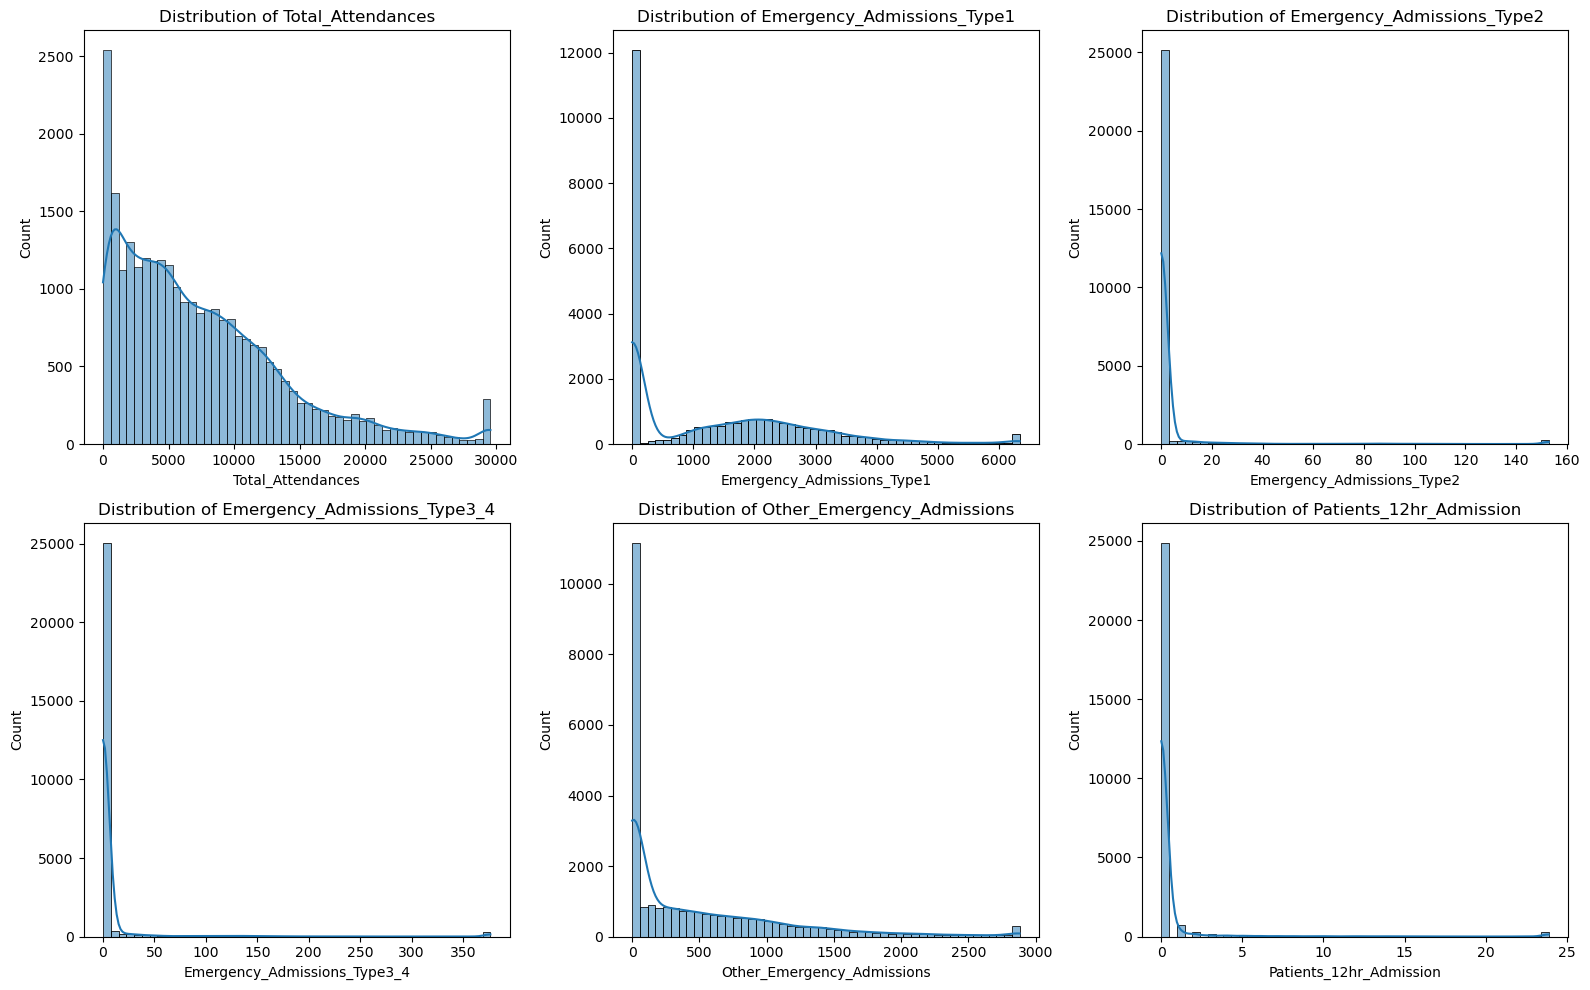

In [54]:
# Distribution of Raw Counts (Optional histograms)
count_features = [
    'Total_Attendances',
    'Emergency_Admissions_Type1',
    'Emergency_Admissions_Type2',
    'Emergency_Admissions_Type3_4',
    'Other_Emergency_Admissions',
    'Patients_12hr_Admission'
]
plt.figure(figsize=(16, 10))
for i, feature in enumerate(count_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.tight_layout()
plt.show()

**Feature Engineering**

In [57]:
# Compute Total Admissions
df_agg["Total_Admissions"] = (
    df_agg["Emergency_Admissions_Type1"] +
    df_agg["Emergency_Admissions_Type2"] +
    df_agg["Emergency_Admissions_Type3_4"] +
    df_agg["Other_Emergency_Admissions"]
)

# Compute Admission Rate
df_agg["Total_Attendances_nozero"] = df_agg["Total_Attendances"].replace(0, 1)
df_agg["Admission_Rate"] = df_agg["Total_Admissions"] / df_agg["Total_Attendances_nozero"]
df_agg.drop(columns=["Total_Attendances_nozero"], inplace=True)


In [59]:
# Remove hospitals where Total Admissions is always zero
df_agg = df_agg[df_agg.groupby("Hospital_Standardized")["Total_Admissions"].transform("sum") > 0]

In [61]:
# Reset index after filtering
df_agg = df_agg.reset_index(drop=True)

In [63]:
# Define the number of lag months to create
lag_months = [1, 2, 3]  

for lag in lag_months:
    df_agg[f'Admission_Rate_Lag{lag}'] = df_agg.groupby('Hospital_Standardized')['Admission_Rate'].shift(lag)
    df_agg[f'Total_Attendances_Lag{lag}'] = df_agg.groupby('Hospital_Standardized')['Total_Attendances'].shift(lag)


In [65]:
# check for missing value in lag feature
missing_counts = df_agg.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Show only columns with missing values
print(missing_counts)


Admission_Rate_Lag1       275
Total_Attendances_Lag1    275
Admission_Rate_Lag2       550
Total_Attendances_Lag2    550
Admission_Rate_Lag3       825
Total_Attendances_Lag3    825
dtype: int64


In [67]:
# Fill missing lag values with median per hospital
for lag in lag_months:
    df_agg[f'Admission_Rate_Lag{lag}'] = (
        df_agg.groupby('Hospital_Standardized', group_keys=False)[f'Admission_Rate_Lag{lag}']
        .apply(lambda x: x.fillna(x.median()))
    )

    df_agg[f'Total_Attendances_Lag{lag}'] = (
        df_agg.groupby('Hospital_Standardized', group_keys=False)[f'Total_Attendances_Lag{lag}']
        .apply(lambda x: x.fillna(x.median()))
    )

# Fill missing values in other numerical columns with median
num_cols = df_agg.select_dtypes(include=['number']).columns
df_agg[num_cols] = df_agg[num_cols].fillna(df_agg[num_cols].median())

# If categorical columns exist, fill them with mode (most frequent value)
cat_cols = df_agg.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_agg[col] = df_agg[col].fillna(df_agg[col].mode()[0])


In [69]:
# Define rolling window sizes
rolling_windows = [3, 6, 12]

# Apply rolling mean within each hospital group
for window in rolling_windows:
    df_agg[f'Admission_Rate_Rolling{window}'] = (
        df_agg.groupby("Hospital_Standardized")["Admission_Rate"]
        .transform(lambda x: x.rolling(window=window, min_periods=1).mean())
    )
    
    df_agg[f'Total_Attendances_Rolling{window}'] = (
        df_agg.groupby("Hospital_Standardized")["Total_Attendances"]
        .transform(lambda x: x.rolling(window=window, min_periods=1).mean())
       )


In [71]:
# Apply Label Encoding to Hospital
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_agg["Hospital_Label"] = label_encoder.fit_transform(df_agg["Hospital_Standardized"])


In [73]:
df_agg = df_agg.rename(columns={'Hospital_Label': 'Hospital_ID'})
print("Renamed Hospital_Label to Hospital_ID")


Renamed Hospital_Label to Hospital_ID


In [75]:
print("Columns in DataFrame:", df_agg.columns.tolist())

Columns in DataFrame: ['Hospital_Standardized', 'Year', 'Month', 'Total_Attendances', 'Emergency_Admissions_Type1', 'Emergency_Admissions_Type2', 'Emergency_Admissions_Type3_4', 'Other_Emergency_Admissions', 'Percentage_4hr', 'Patients_12hr_Admission', 'Type1_AE', 'Type2_AE', 'Type3_AE', 'Total_Admissions', 'Admission_Rate', 'Admission_Rate_Lag1', 'Total_Attendances_Lag1', 'Admission_Rate_Lag2', 'Total_Attendances_Lag2', 'Admission_Rate_Lag3', 'Total_Attendances_Lag3', 'Admission_Rate_Rolling3', 'Total_Attendances_Rolling3', 'Admission_Rate_Rolling6', 'Total_Attendances_Rolling6', 'Admission_Rate_Rolling12', 'Total_Attendances_Rolling12', 'Hospital_ID']


**Exploratory Data Analysis (EDA) Stage 2**

In [78]:
# Overall admission rate
total_attendances = df_agg['Total_Attendances'].sum()
total_admissions = df_agg['Total_Admissions'].sum()

overall_admission_rate = (total_admissions / total_attendances) * 100
print(f"Overall Admission Rate: {overall_admission_rate:.2f}%")


Overall Admission Rate: 28.74%


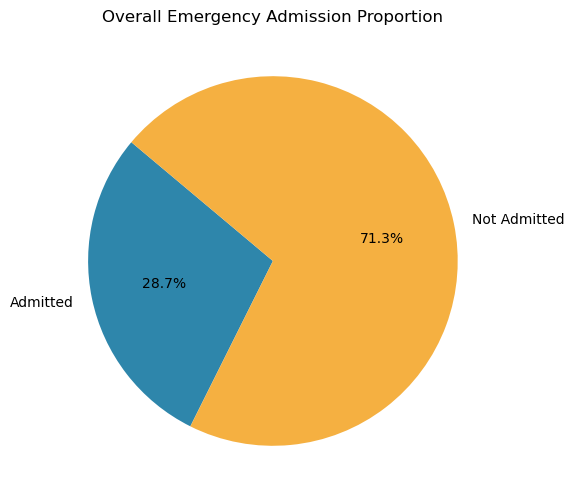

In [80]:
import matplotlib.pyplot as plt

# Calculate total attendances and admissions
total_attendances = df_agg['Total_Attendances'].sum()
total_admissions = df_agg['Total_Admissions'].sum()
non_admissions = total_attendances - total_admissions

# Pie chart
labels = ['Admitted', 'Not Admitted']
sizes = [total_admissions, non_admissions]
colors = ['#2E86AB', '#F5B041']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Overall Emergency Admission Proportion')
plt.show()


<Figure size 1200x600 with 0 Axes>

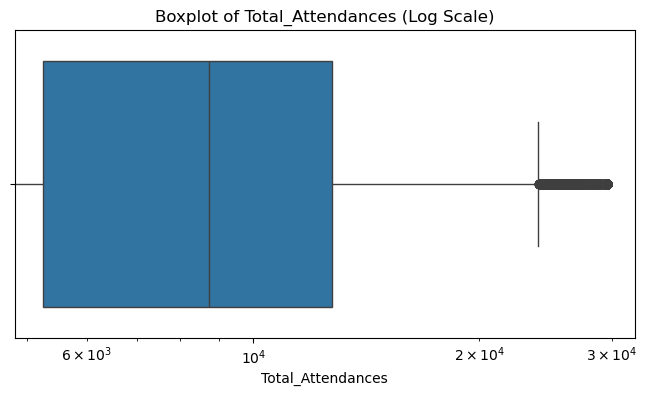

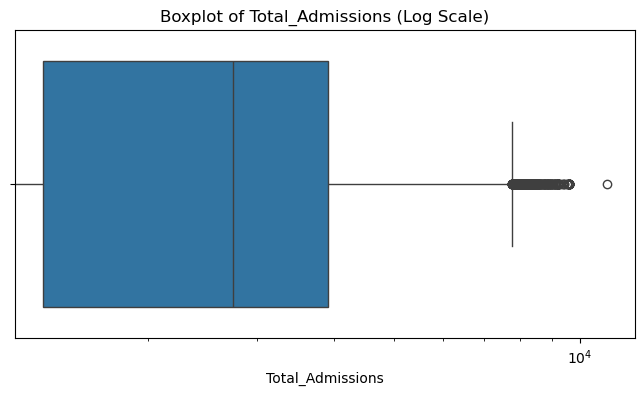

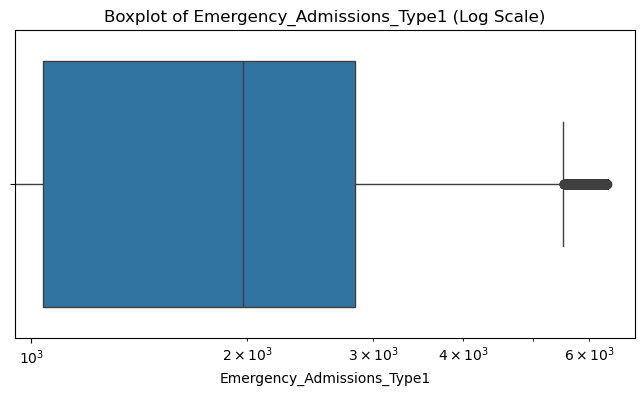

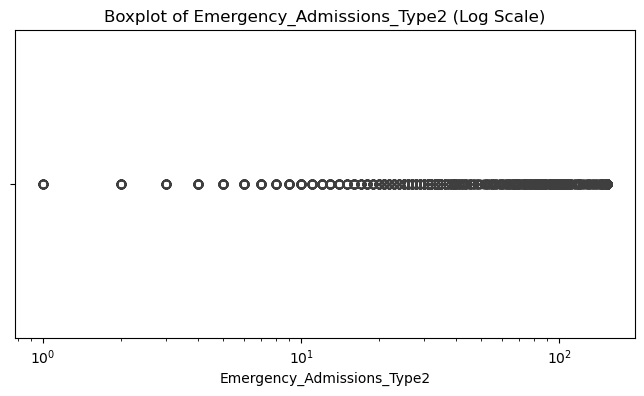

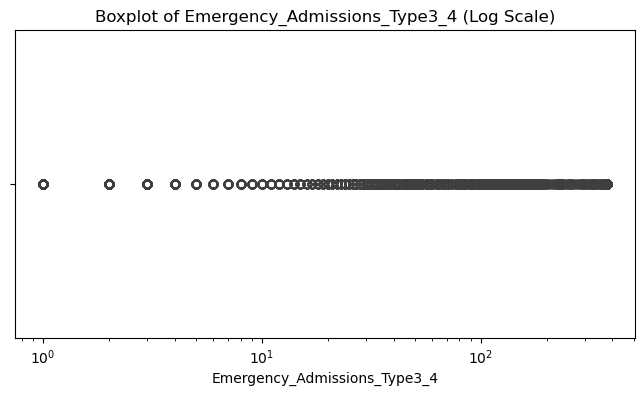

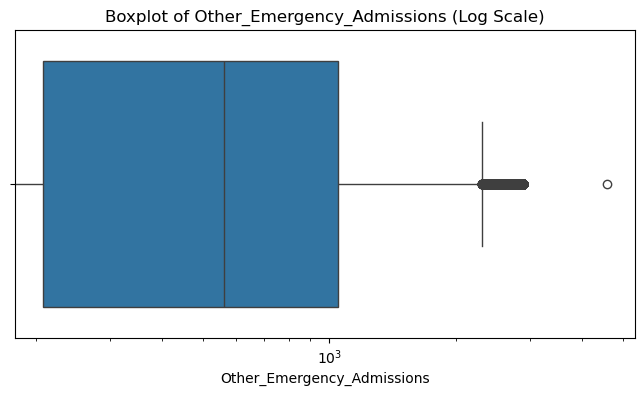

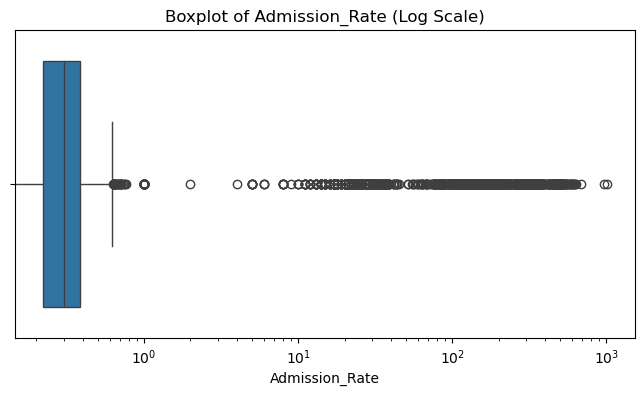

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define numerical features to check for outliers
num_features = [
    "Total_Attendances", "Total_Admissions", "Emergency_Admissions_Type1", 
    "Emergency_Admissions_Type2", "Emergency_Admissions_Type3_4", 
    "Other_Emergency_Admissions", "Admission_Rate"
]

# Set figure size
plt.figure(figsize=(12, 6))

# Loop through features to create individual boxplots
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_agg[feature])
    plt.xscale("log")  # Apply log transformation for better visualization
    plt.title(f"Boxplot of {feature} (Log Scale)")
    plt.show()


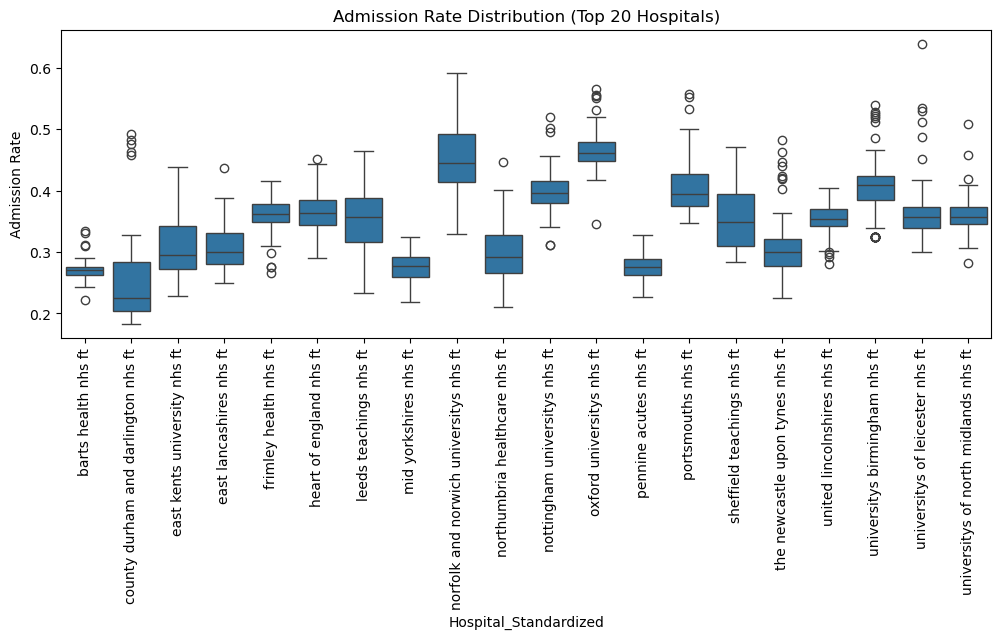

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 20 hospitals by total admissions in df_agg
top_hospitals = df_agg.groupby("Hospital_Standardized")["Total_Admissions"].sum().nlargest(20).index
df_top = df_agg[df_agg["Hospital_Standardized"].isin(top_hospitals)]

# Plot the boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_top, x="Hospital_Standardized", y="Admission_Rate")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Admission Rate Distribution (Top 20 Hospitals)")
plt.xlabel("Hospital_Standardized")
plt.ylabel("Admission Rate")
plt.show()


In [86]:
from scipy.stats import f_oneway

# Calculate mean admission rate per hospital
mean_admission_rate = df_agg.groupby('Hospital_Standardized')['Admission_Rate'].mean().sort_values(ascending=False).head(20)

# Prepare data for ANOVA (top 20 hospitals)
top_20_hospitals = mean_admission_rate.index.tolist()
anova_data = [df_agg[df_agg['Hospital_Standardized'] == hospital]['Admission_Rate'].values for hospital in top_20_hospitals]

# Perform ANOVA test
f_stat, p_value = f_oneway(*anova_data)

print(f"ANOVA F-Statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4e}")

# Interpretation
if p_value < 0.05:
    print("✅ Result: Statistically significant difference in mean admission rates across hospitals (p < 0.05).")
else:
    print("⚠️ Result: No statistically significant difference in mean admission rates (p >= 0.05).")


ANOVA F-Statistic: 401.2202
ANOVA p-value: 0.0000e+00
✅ Result: Statistically significant difference in mean admission rates across hospitals (p < 0.05).


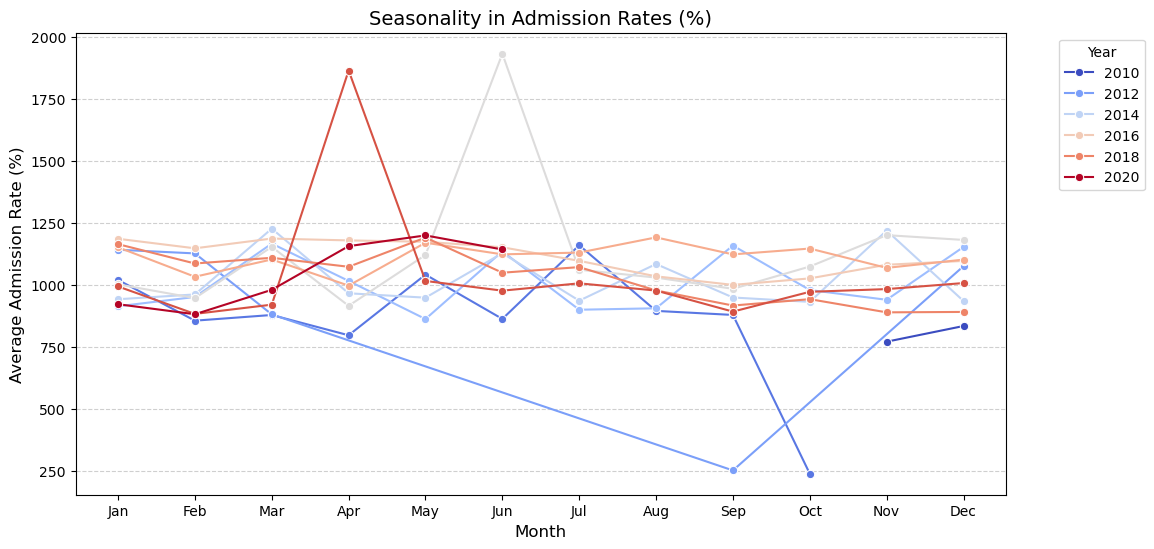

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate to get mean admission rate per month-year
df_monthly = df_agg.groupby(["Year", "Month"])["Admission_Rate"].mean().reset_index()

# Convert admission rate to percentage
df_monthly["Admission_Rate"] *= 100  

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_monthly, 
    x="Month", 
    y="Admission_Rate", 
    hue="Year", 
    palette="coolwarm",
    marker="o"  # Add markers for better visualization
)
# Formatting
plt.title("Seasonality in Admission Rates (%)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Admission Rate (%)", fontsize=12)
plt.xticks(
    range(1, 13), 
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()

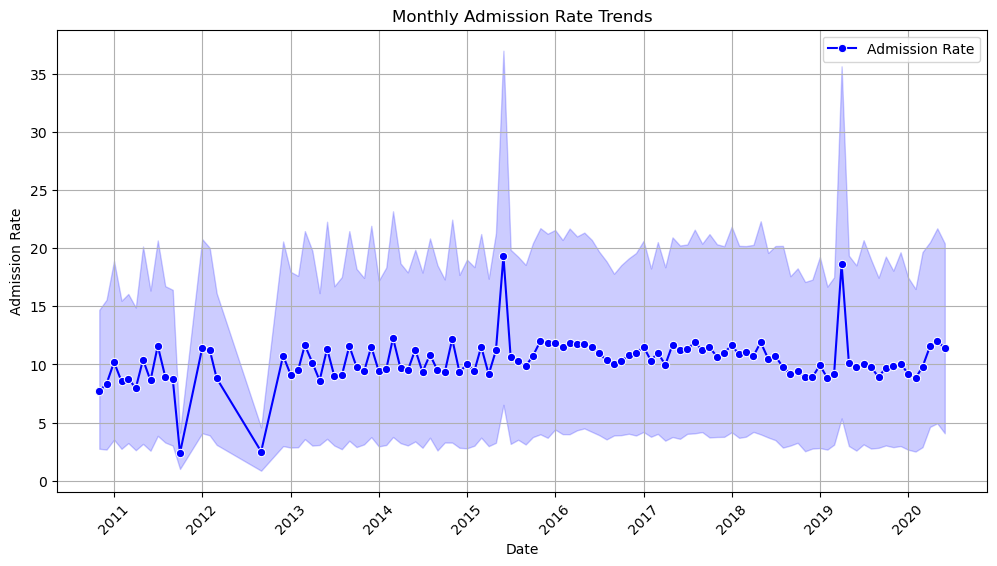

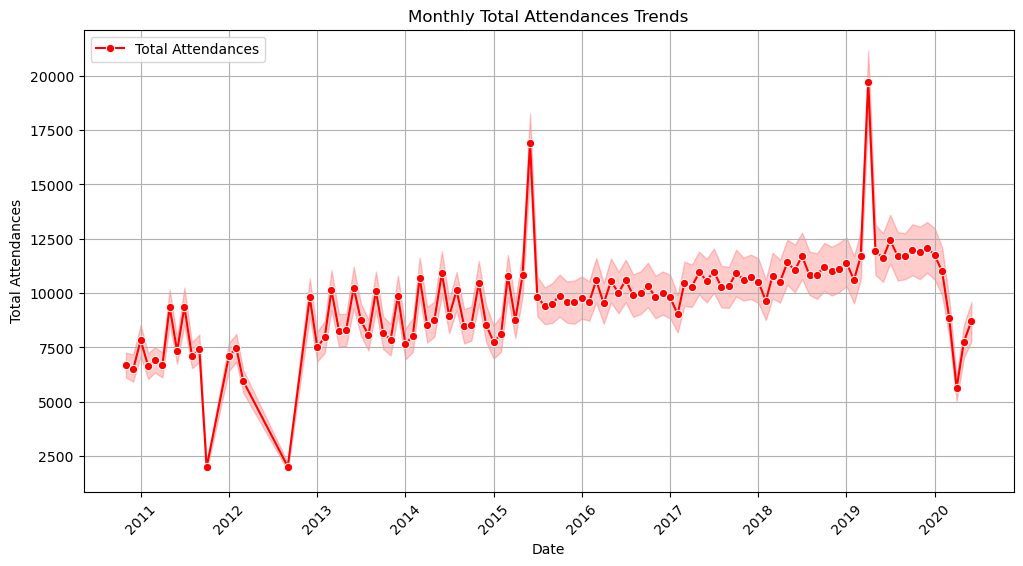

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format (if not already)
df_agg['date'] = pd.to_datetime(df_agg[['Year', 'Month']].assign(day=1))  # Start-of-month date

# Set figure size
plt.figure(figsize=(12, 6))

# 📌 Plot Admission Rate Trends Over Time
sns.lineplot(data=df_agg, x='date', y='Admission_Rate', marker='o', label="Admission Rate", color='b')
plt.title("Monthly Admission Rate Trends")
plt.xlabel("Date")
plt.ylabel("Admission Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 📌 Plot Total Attendances Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agg, x='date', y='Total_Attendances', marker='o', label="Total Attendances", color='r')
plt.title("Monthly Total Attendances Trends")
plt.xlabel("Date")
plt.ylabel("Total Attendances")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

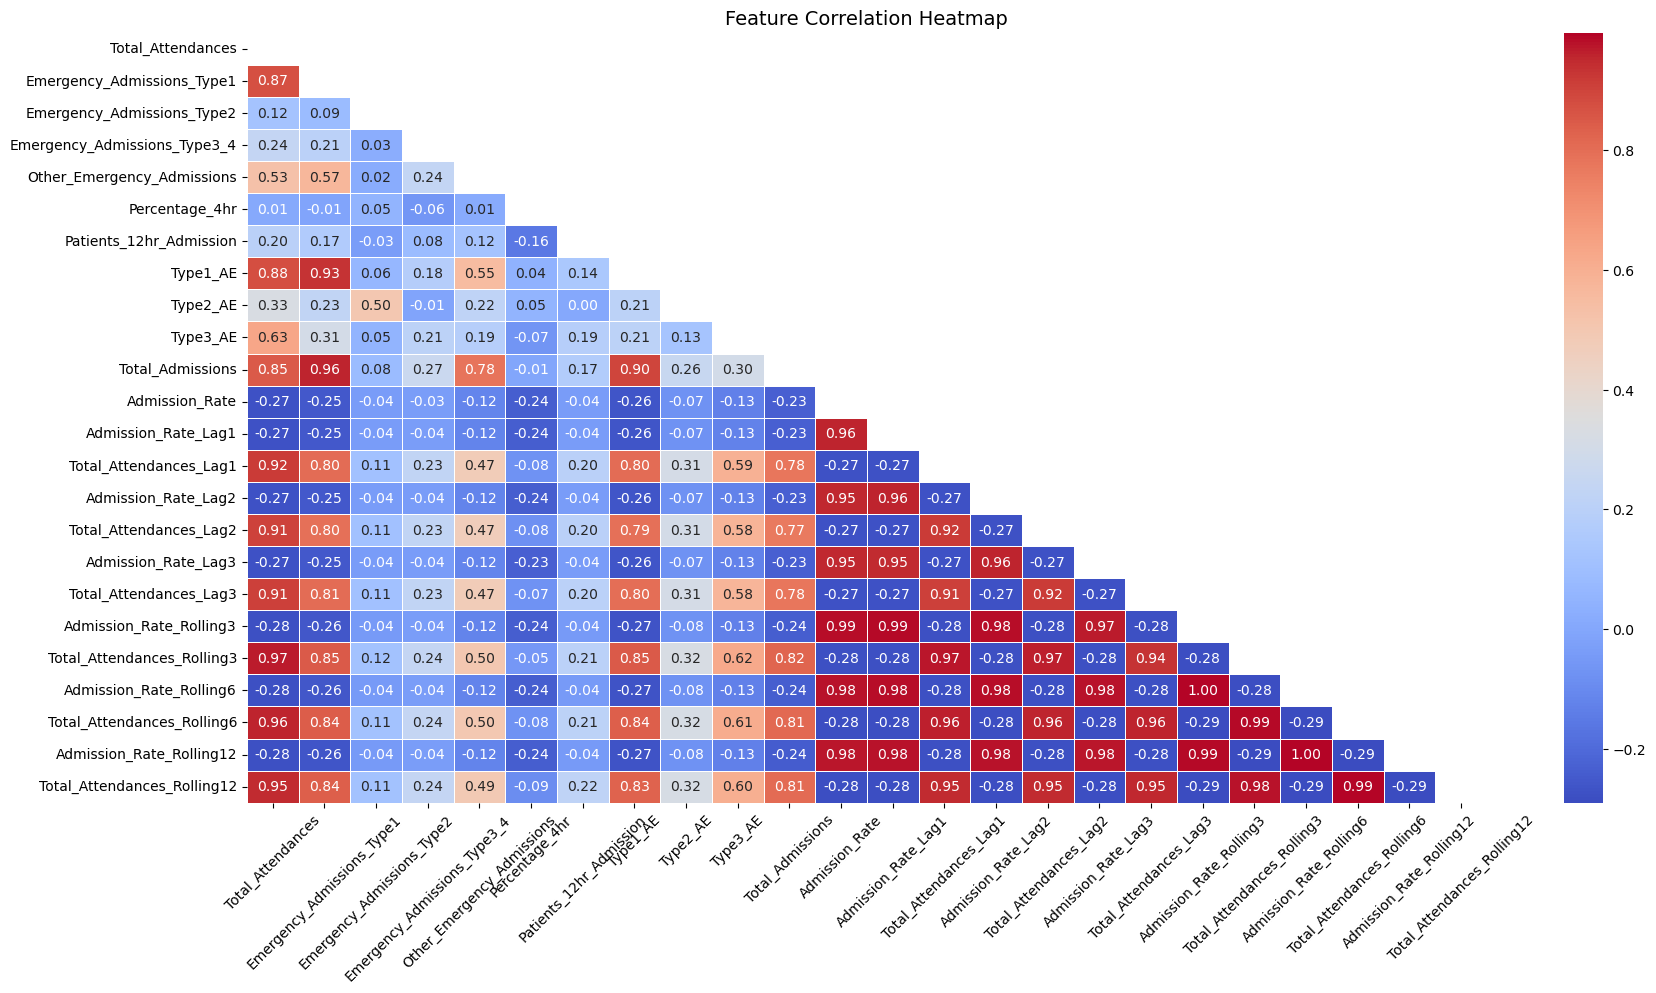


🔹 Top Features Correlated with Admission Rate:
Admission_Rate                  1.000000
Admission_Rate_Rolling3         0.985431
Admission_Rate_Rolling6         0.980341
Admission_Rate_Rolling12        0.975939
Admission_Rate_Lag1             0.960133
Admission_Rate_Lag2             0.953346
Admission_Rate_Lag3             0.951519
Total_Attendances_Rolling12     0.282887
Total_Attendances_Rolling6      0.281655
Total_Attendances_Rolling3      0.279461
Total_Attendances_Lag1          0.272469
Total_Attendances_Lag2          0.272297
Total_Attendances               0.272031
Total_Attendances_Lag3          0.271894
Type1_AE                        0.262892
Emergency_Admissions_Type1      0.254653
Percentage_4hr                  0.237177
Total_Admissions                0.233544
Type3_AE                        0.129505
Other_Emergency_Admissions      0.116543
Type2_AE                        0.074567
Emergency_Admissions_Type2      0.043801
Patients_12hr_Admission         0.043382
Emergency

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns dynamically
num_cols = df_agg.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Compute correlation matrix
correlation_matrix = df_agg[num_cols].corr()

# Sort features based on correlation with Admission Rate (absolute values)
correlation_sorted = correlation_matrix["Admission_Rate"].abs().sort_values(ascending=False)

# Plot heatmap with a mask for better readability
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    mask=mask
)

# Formatting
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print top correlated features with Admission Rate
print("\n🔹 Top Features Correlated with Admission Rate:")
print(correlation_sorted)

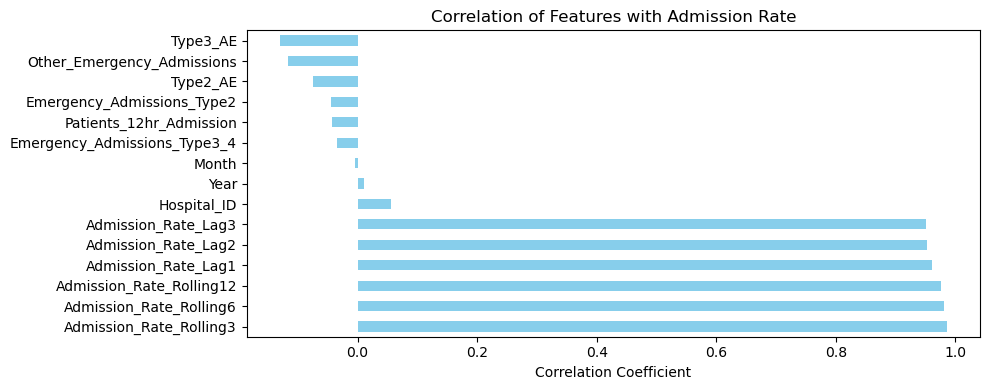

In [94]:
# Drop non-numeric columns before correlation
numeric_df = df_agg.select_dtypes(include=['number'])

# Compute correlation with Admission_Rate
corr_series = numeric_df.corr()['Admission_Rate'].sort_values(ascending=False)

# Optional: Plot top correlated features (excluding Admission_Rate itself)
plt.figure(figsize=(10,4))
corr_series[1:16].plot(kind='barh', color='skyblue')  # Skip first (Admission_Rate itself)
plt.title("Correlation of Features with Admission Rate")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


**Feature Selection**

In [97]:
from sklearn.feature_selection import VarianceThreshold

## Variance Thresholding (Remove Low-Variance Features)
# Define threshold (remove features with near-constant values)
threshold = 0.01  # If a feature varies by less than 1%, drop it
selector = VarianceThreshold(threshold)
X_var = selector.fit_transform(df_agg.drop(columns=["Hospital_Standardized", "Year", "Month", "date"], errors="ignore"))

# Get selected feature names
selected_features = df_agg.drop(columns=["Hospital_Standardized", "Year", "Month", "date"], errors="ignore").columns[selector.get_support()]
print("Selected Features after Variance Thresholding:", list(selected_features))


Selected Features after Variance Thresholding: ['Total_Attendances', 'Emergency_Admissions_Type1', 'Emergency_Admissions_Type2', 'Emergency_Admissions_Type3_4', 'Other_Emergency_Admissions', 'Percentage_4hr', 'Patients_12hr_Admission', 'Type1_AE', 'Type2_AE', 'Type3_AE', 'Total_Admissions', 'Admission_Rate', 'Admission_Rate_Lag1', 'Total_Attendances_Lag1', 'Admission_Rate_Lag2', 'Total_Attendances_Lag2', 'Admission_Rate_Lag3', 'Total_Attendances_Lag3', 'Admission_Rate_Rolling3', 'Total_Attendances_Rolling3', 'Admission_Rate_Rolling6', 'Total_Attendances_Rolling6', 'Admission_Rate_Rolling12', 'Total_Attendances_Rolling12', 'Hospital_ID']


In [99]:
import numpy as np

## Correlation Filtering (Remove Highly Correlated Features)
# Compute correlation matrix
corr_matrix = df_agg[selected_features].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation higher than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop highly correlated features
df_selected = df_agg.drop(columns=to_drop)
print(f"Removed {len(to_drop)} highly correlated features:", to_drop)


Removed 15 highly correlated features: ['Emergency_Admissions_Type1', 'Type1_AE', 'Total_Admissions', 'Admission_Rate_Lag1', 'Total_Attendances_Lag1', 'Admission_Rate_Lag2', 'Total_Attendances_Lag2', 'Admission_Rate_Lag3', 'Total_Attendances_Lag3', 'Admission_Rate_Rolling3', 'Total_Attendances_Rolling3', 'Admission_Rate_Rolling6', 'Total_Attendances_Rolling6', 'Admission_Rate_Rolling12', 'Total_Attendances_Rolling12']


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import pandas as pd

# Define Features & Target
target = "Admission_Rate"
selected_features = [
    "Year", "Month",  # Seasonality
    "Total_Attendances", "Total_Admissions",  # Overall patient flow
    "Percentage_4hr", "Patients_12hr_Admission", "Other_Emergency_Admissions",  # Efficiency & admission delays
    "Admission_Rate_Lag1", "Admission_Rate_Lag2", "Admission_Rate_Lag3",  # Short-term admission trends
    "Admission_Rate_Rolling6", "Admission_Rate_Rolling12"  # Long-term rolling trends
]

X = df_agg[selected_features]
y = df_agg[target]

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Compute Permutation Importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=5, random_state=42)

# Convert Results to DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": selected_features,
    "Permutation_Importance": perm_importance.importances_mean
})

# Sort by Importance
feature_importance_df = feature_importance_df.sort_values(by="Permutation_Importance", ascending=False)

# Display the DataFrame
print("\nPermutation Feature Importance:\n", feature_importance_df)



Permutation Feature Importance:
                        Feature  Permutation_Importance
10     Admission_Rate_Rolling6            5.352598e+00
3             Total_Admissions            8.336751e-01
6   Other_Emergency_Admissions            7.665461e-02
7          Admission_Rate_Lag1            2.716850e-02
2            Total_Attendances            2.654849e-03
4               Percentage_4hr            1.503985e-03
11    Admission_Rate_Rolling12            1.441281e-03
8          Admission_Rate_Lag2            1.458388e-04
9          Admission_Rate_Lag3            1.169559e-04
0                         Year            4.120030e-05
1                        Month            6.109477e-06
5      Patients_12hr_Admission            8.667368e-10


**Model Training & Evaluation**

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge  # Regularized version of Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Updated Feature Set
selected_features = ['Total_Attendances', 'Total_Admissions', 'Other_Emergency_Admissions',
                     'Percentage_4hr', 'Patients_12hr_Admission',
                     'Admission_Rate_Lag1', 'Admission_Rate_Lag2'] 

# Define Features & Target
X = df_agg[selected_features]
y = df_agg["Admission_Rate"]

# Handle Missing Values (if any)
X = X.fillna(0)
y = y.fillna(0)

# Display dataset shape
print(f"Dataset Shape: {X.shape}")


Dataset Shape: (18209, 7)


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (14567, 7), Test Set: (3642, 7)


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Baseline Models 
baseline_models = {
    "Ridge Regression": Ridge(),  # Default
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "MLP Neural Network": MLPRegressor(random_state=42)
}

# Train Models & Evaluate
baseline_train_results = {}
baseline_test_results = {}

for name, model in baseline_models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Store metrics
    baseline_train_results[name] = {
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "R²": r2_score(y_train, y_train_pred)
    }

    baseline_test_results[name] = {
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "R²": r2_score(y_test, y_test_pred)
    }

# Convert to DataFrames
baseline_train_df = pd.DataFrame(baseline_train_results).T
baseline_test_df = pd.DataFrame(baseline_test_results).T

# Display Results
print("\n📊 Baseline Model Performance (Train Set):\n")
display(baseline_train_df)

print("\n📊 Baseline Model Performance (Test Set):\n")
display(baseline_test_df)



📊 Baseline Model Performance (Train Set):



C:\Users\oguch\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE       RMSE        R²
Ridge Regression    2.286384  14.423355  0.933526
Random Forest       0.059919   1.589677  0.999193
XGBoost             0.055138   0.229782  0.999983
MLP Neural Network  2.171781  10.142757  0.967128


📊 Baseline Model Performance (Test Set):



MAE       RMSE        R²
Ridge Regression    1.988422  11.788473  0.939074
Random Forest       0.051066   0.387543  0.999934
XGBoost             0.151579   1.020228  0.999544
MLP Neural Network  1.945534   7.996793  0.971964

C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\1029888788.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


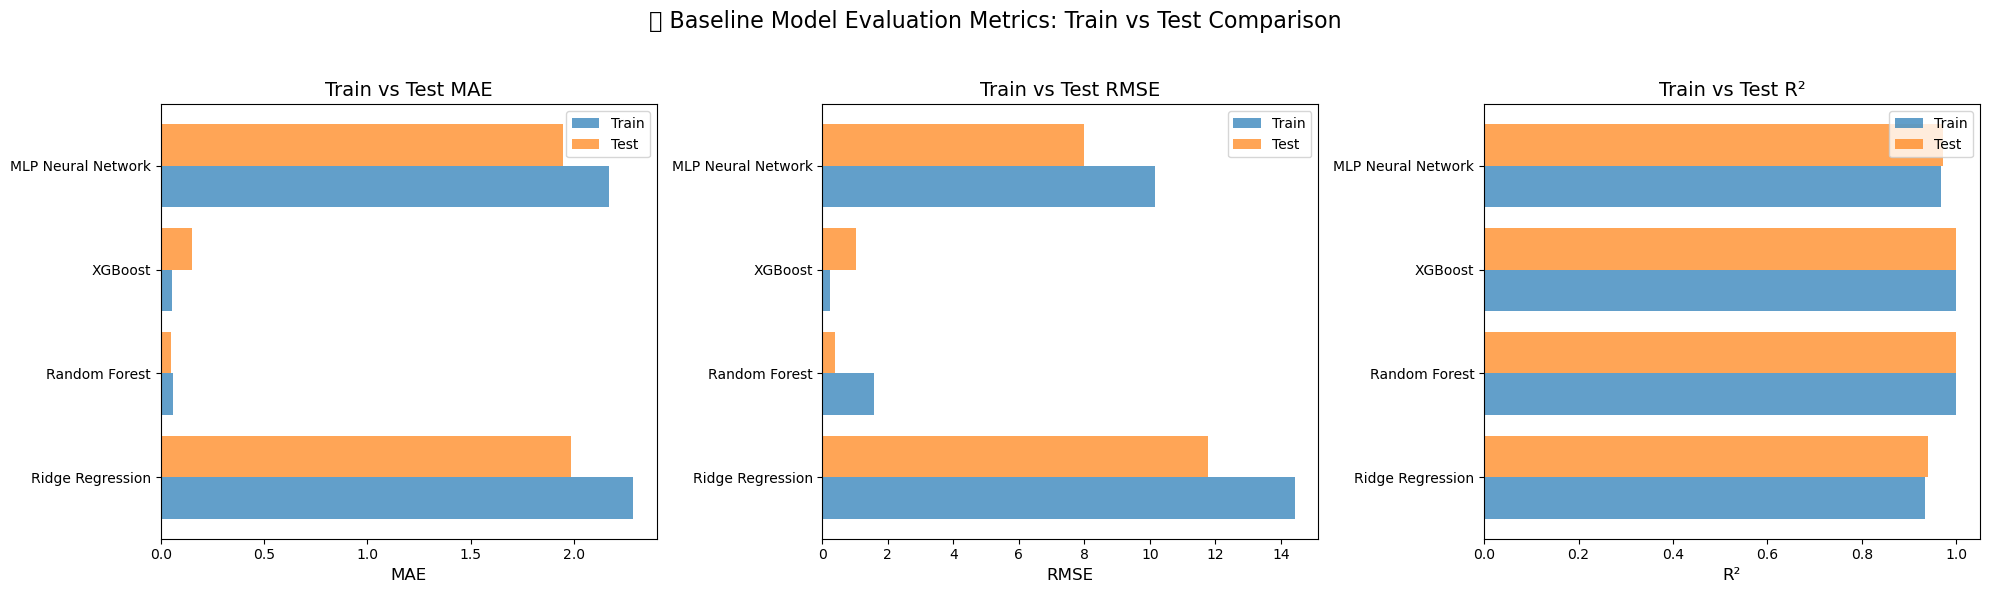

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
metrics = ["MAE", "RMSE", "R²"]
colors = ["#1f77b4", "#ff7f0e"]  # Train = blue, Test = orange

# Plot
for i, metric in enumerate(metrics):
    ax = axes[i]
    width = 0.4
    y = np.arange(len(baseline_train_df.index))

    ax.barh(y - width/2, baseline_train_df[metric], height=width, label="Train", color=colors[0], alpha=0.7)
    ax.barh(y + width/2, baseline_test_df[metric], height=width, label="Test", color=colors[1], alpha=0.7)

    ax.set_yticks(y)
    ax.set_yticklabels(baseline_train_df.index, fontsize=10)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_title(f"Train vs Test {metric}", fontsize=14)
    ax.legend()

plt.suptitle("📊 Baseline Model Evaluation Metrics: Train vs Test Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Baseline Model Feature Importance**

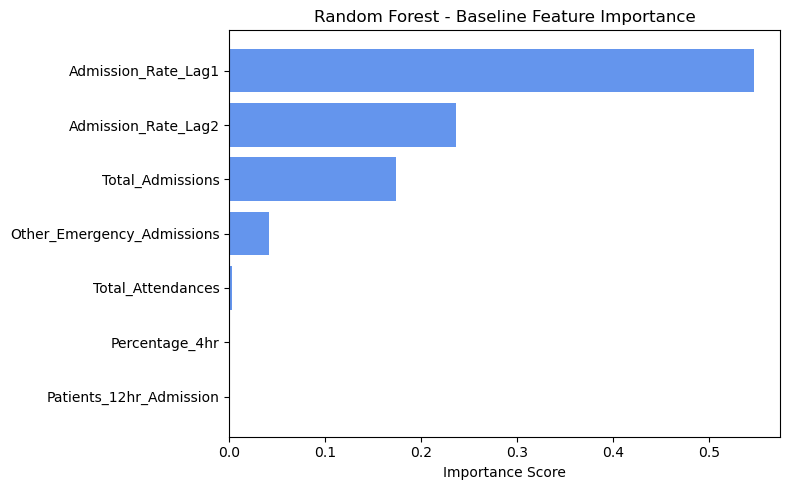

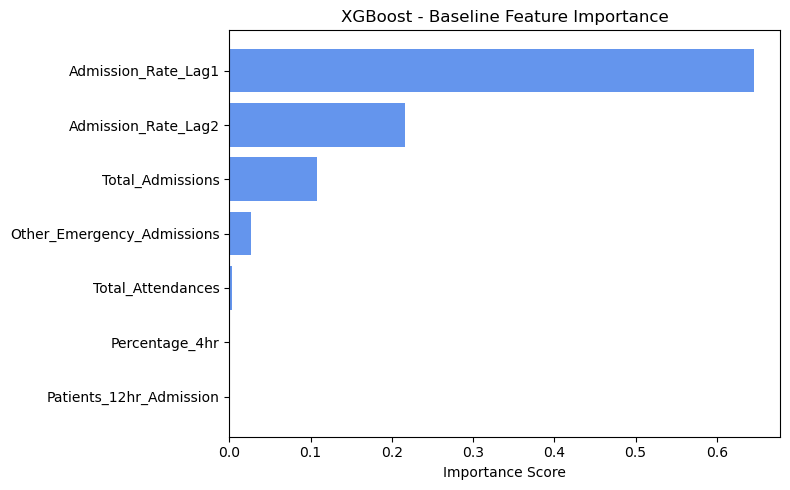

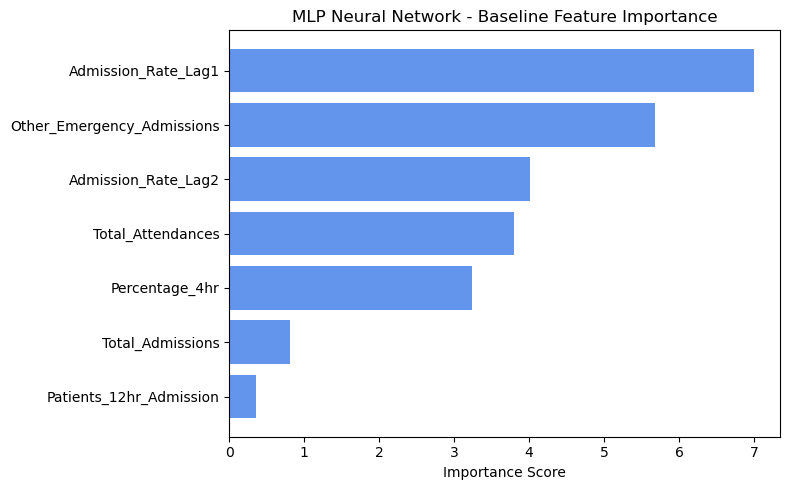

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Get feature names used in training
feature_names = X.columns.tolist()

# Initialize dictionaries to store importances
baseline_feature_importance = {}

# Random Forest Feature Importance
rf_model = baseline_models["Random Forest"]
rf_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
baseline_feature_importance["Random Forest"] = rf_importance_df

# XGBoost Feature Importance
xgb_model = baseline_models["XGBoost"]
xgb_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
baseline_feature_importance["XGBoost"] = xgb_importance_df

# MLP: Permutation Importance
mlp_model = baseline_models["MLP Neural Network"]
mlp_perm = permutation_importance(mlp_model, X_test_scaled, y_test, scoring="neg_mean_absolute_error", n_repeats=10, random_state=42)

mlp_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": mlp_perm.importances_mean
}).sort_values(by="Importance", ascending=False)
baseline_feature_importance["MLP Neural Network"] = mlp_importance_df

# Plot Feature Importances
for model_name, df_importance in baseline_feature_importance.items():
    plt.figure(figsize=(8, 5))
    plt.barh(df_importance["Feature"], df_importance["Importance"], color="cornflowerblue")
    plt.xlabel("Importance Score")
    plt.title(f"{model_name} - Baseline Feature Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [122]:
print(f"Number of features: {len(feature_names)}")
print(f"Random Forest importance scores: {len(rf_model.feature_importances_)}")
print(f"XGBoost importance scores: {len(xgb_model.feature_importances_)}")
print(f"MLP importance scores: {len(mlp_perm.importances_mean)}")


Number of features: 7
Random Forest importance scores: 7
XGBoost importance scores: 7
MLP importance scores: 7


**Model Optimization**

Train_MAE  Test_MAE  Train_RMSE  \
Ridge Regression                     1.556586  1.180381   10.687372   
Random Forest (Optimized)            0.132325  0.117793    3.025661   
XGBoost (Optimized)                  0.385022  0.313142    5.046469   
MLP Neural Network (Dropout Added)   0.473916  0.476432    2.708269   

                                    Test_RMSE  Train_R²   Test_R²  
Ridge Regression                     7.710056  0.963503  0.973938  
Random Forest (Optimized)            1.900884  0.997075  0.998416  
XGBoost (Optimized)                  1.645770  0.991862  0.998813  
MLP Neural Network (Dropout Added)   2.643741  0.997656  0.996936

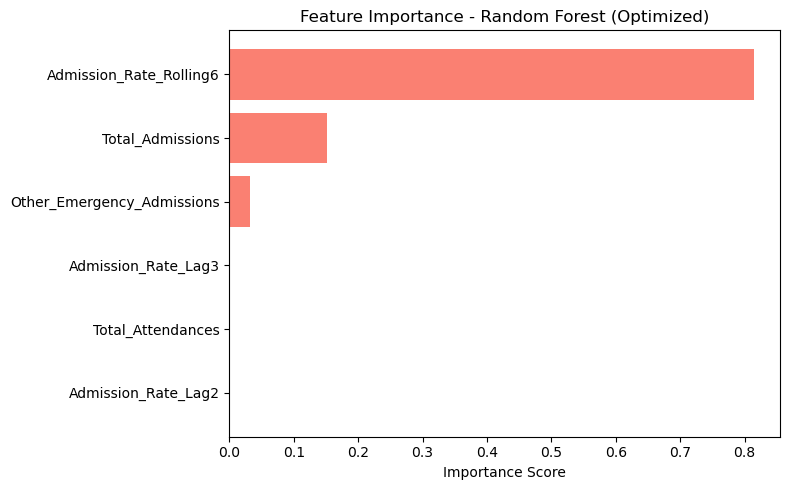

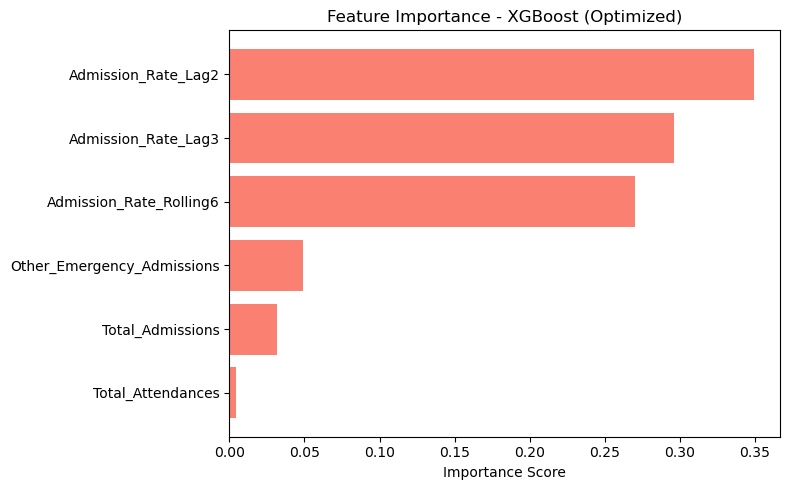

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define Refined Feature Set
selected_features = [
    "Total_Attendances", "Total_Admissions", "Other_Emergency_Admissions",
    "Admission_Rate_Lag2", "Admission_Rate_Lag3", "Admission_Rate_Rolling6"
]

# Features & Target
X = df_agg[selected_features]
y = df_agg["Admission_Rate"]

# Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Optimized Models (With Regularization)
models = {
    "Ridge Regression": Ridge(alpha=5.0),
    "Random Forest (Optimized)": RandomForestRegressor(
        n_estimators=100,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    ),
    "XGBoost (Optimized)": XGBRegressor(
        n_estimators=100,
        learning_rate=0.05,
        reg_lambda=10,
        reg_alpha=5,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    "MLP Neural Network (Dropout Added)": MLPRegressor(
        hidden_layer_sizes=(50, 30),
        alpha=0.01,
        max_iter=500,
        random_state=42
    )
}

# Train & Evaluate Models
results = {}
feature_importance = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics
    results[name] = {
        "Train_MAE": mean_absolute_error(y_train, y_train_pred),
        "Test_MAE": mean_absolute_error(y_test, y_test_pred),
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test_RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train_R²": r2_score(y_train, y_train_pred),
        "Test_R²": r2_score(y_test, y_test_pred),
    }
    # Feature Importance (for tree-based models only)
    if hasattr(model, "feature_importances_"):
        feature_importance[name] = pd.DataFrame({
            "Feature": selected_features,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)

# Results Table
results_df = pd.DataFrame(results).T
display(results_df)

# Feature Importance Plot
for model_name, importance_df in feature_importance.items():
    plt.figure(figsize=(8, 5))
    plt.barh(importance_df["Feature"], importance_df["Importance"], color="salmon")
    plt.xlabel("Importance Score")
    plt.title(f"Feature Importance - {model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

**Feature Importance (SHAP) for MLP**


🔍 MLP Permutation Importance:



Feature  Importance
2  Other_Emergency_Admissions   17.965163
0           Total_Attendances   14.937537
5     Admission_Rate_Rolling6   10.786417
4         Admission_Rate_Lag3   10.162042
3         Admission_Rate_Lag2    7.272235
1            Total_Admissions    5.484389

C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\73039419.py:54: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


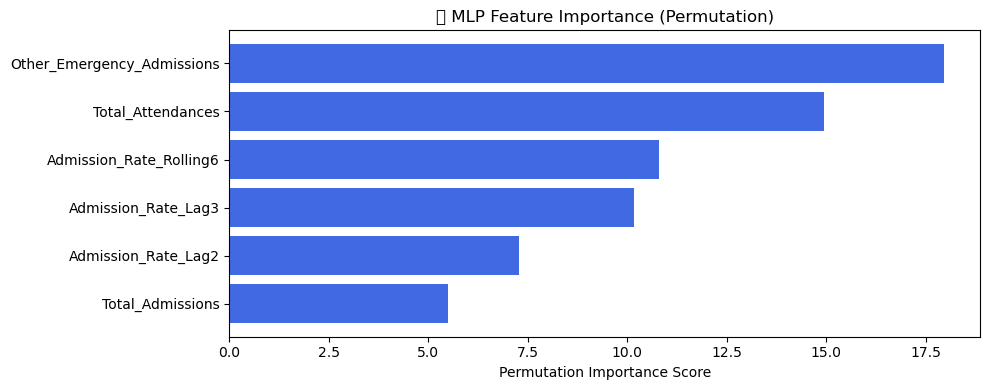

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Match the exact features used for MLP training
selected_features_mlp = [
    "Total_Attendances", "Total_Admissions", "Other_Emergency_Admissions",
    "Admission_Rate_Lag2", "Admission_Rate_Lag3", "Admission_Rate_Rolling6"
]

# Prepare the test data using those same features
X_mlp = df_agg[selected_features_mlp].fillna(0)
y_mlp = df_agg["Admission_Rate"].fillna(0)

# Use same scaler you used for MLP training
X_mlp_scaled = scaler.transform(X_mlp)

# Split again to use test set only to avoid data leakage
from sklearn.model_selection import train_test_split
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(
    X_mlp_scaled, y_mlp, test_size=0.2, random_state=42
)

# Use the correct trained model
mlp_model = models["MLP Neural Network (Dropout Added)"]

# Compute Permutation Importance
mlp_importance = permutation_importance(
    mlp_model,
    X_test_mlp,  # ✅ Scaled features used during training
    y_test_mlp,  # ✅ Corresponding y values
    scoring="neg_mean_absolute_error",
    n_repeats=10,
    random_state=42
)

# Visualize and format results
mlp_feature_importance = pd.DataFrame({
    "Feature": selected_features_mlp,
    "Importance": mlp_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Display as table
print("\n🔍 MLP Permutation Importance:\n")
display(mlp_feature_importance)

# Plot
plt.figure(figsize=(10, 4))
plt.barh(mlp_feature_importance["Feature"], mlp_feature_importance["Importance"], color="royalblue")
plt.xlabel("Permutation Importance Score")
plt.title("🔍 MLP Feature Importance (Permutation)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Best Model Validation**


✅ Final Validation Metrics:



Model Dataset       MAE      RMSE        R²
0           Random Forest (Optimized)   Train  0.132325  3.025661  0.997075
1           Random Forest (Optimized)    Test  0.117793  1.900884  0.998416
2                 XGBoost (Optimized)   Train  0.385022  5.046469  0.991862
3                 XGBoost (Optimized)    Test  0.313142  1.645770  0.998813
4  MLP Neural Network (Dropout Added)   Train  0.473916  2.708269  0.997656
5  MLP Neural Network (Dropout Added)    Test  0.476432  2.643741  0.996936

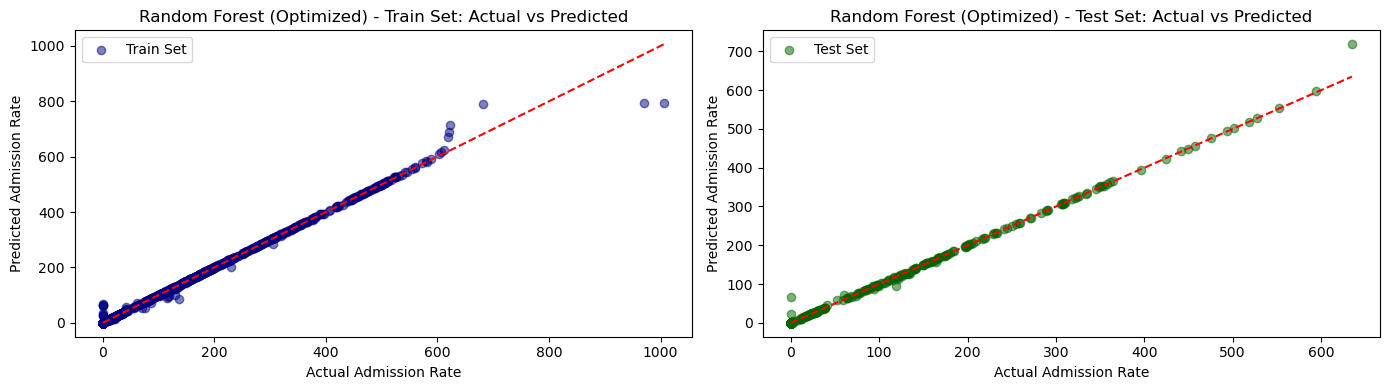

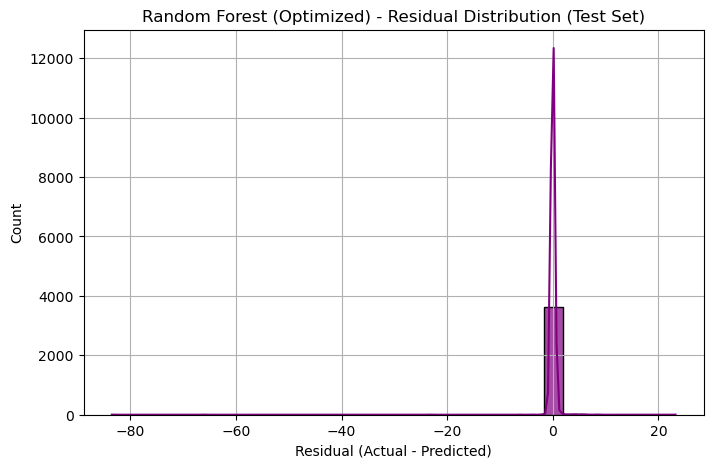

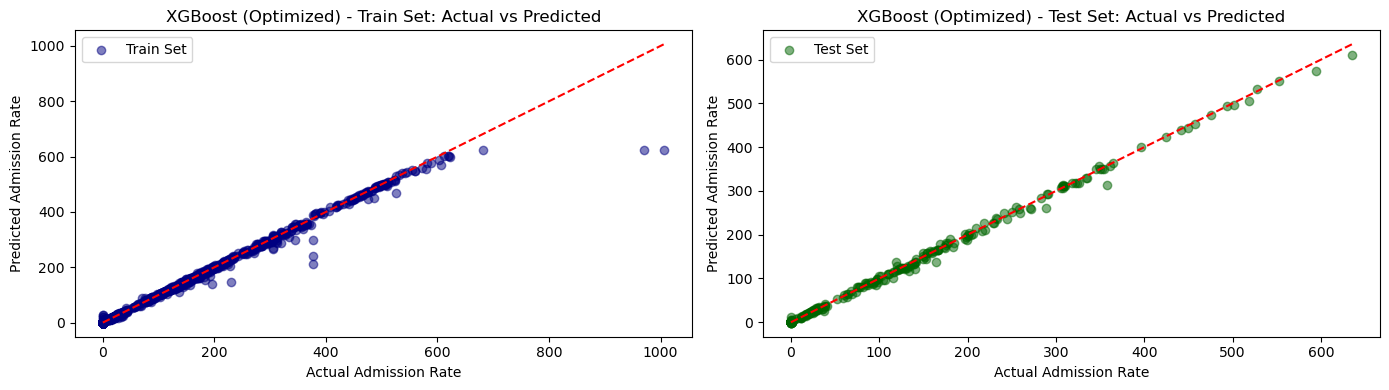

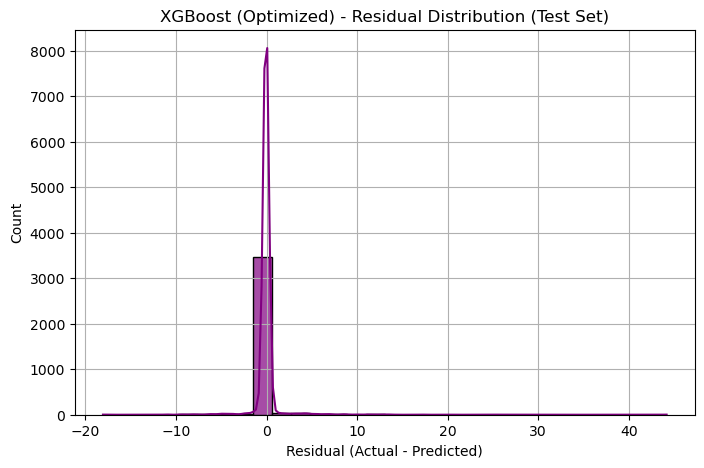

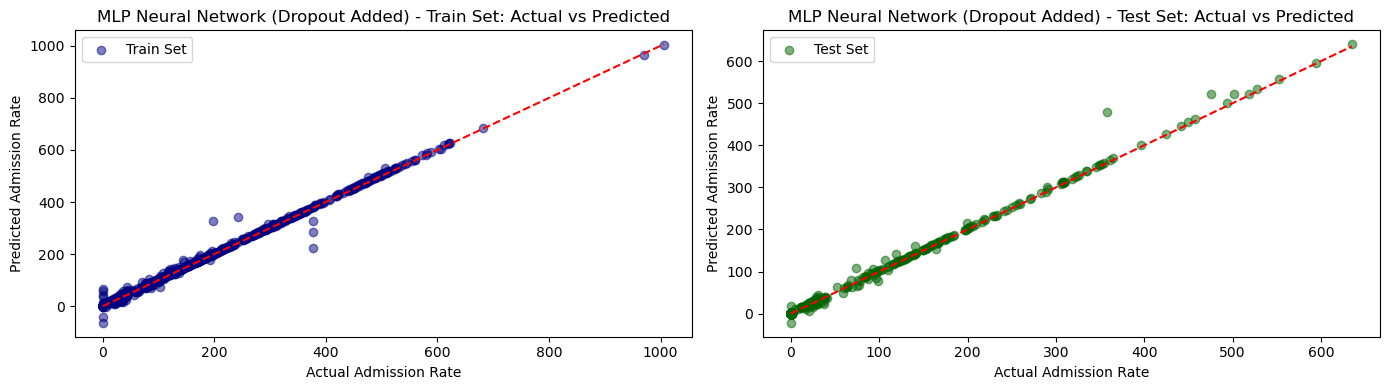

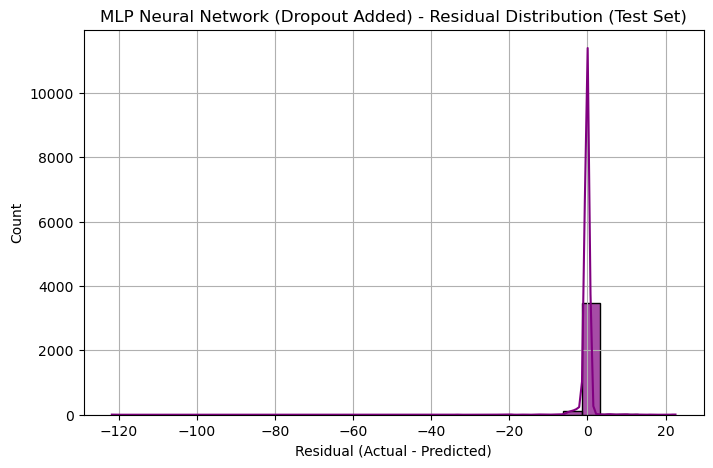

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models to validate
model_names = ["Random Forest (Optimized)", "XGBoost (Optimized)", "MLP Neural Network (Dropout Added)"]

# Store evaluation results
validation_results = []

# Validation Loop
for name in model_names:
    model = models[name]
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluation Metrics
    validation_results.append({
        "Model": name,
        "Dataset": "Train",
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "R²": r2_score(y_train, y_train_pred)
    })

    validation_results.append({
        "Model": name,
        "Dataset": "Test",
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "R²": r2_score(y_test, y_test_pred)
    })

# Convert to DataFrame
validation_df = pd.DataFrame(validation_results)
print("\n✅ Final Validation Metrics:\n")
display(validation_df)

# ✅ Plot Actual vs Predicted & Residuals for Each Model
for name in model_names:
    model = models[name]
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Actual vs Predicted Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    axes[0].scatter(y_train, y_train_pred, alpha=0.5, color="navy", label="Train Set")
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    axes[0].set_title(f"{name} - Train Set: Actual vs Predicted")
    axes[0].set_xlabel("Actual Admission Rate")
    axes[0].set_ylabel("Predicted Admission Rate")
    axes[0].legend()

    axes[1].scatter(y_test, y_test_pred, alpha=0.5, color="darkgreen", label="Test Set")
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[1].set_title(f"{name} - Test Set: Actual vs Predicted")
    axes[1].set_xlabel("Actual Admission Rate")
    axes[1].set_ylabel("Predicted Admission Rate")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # Residual Distribution (Test Set)
    residuals = y_test - y_test_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30, color="purple", alpha=0.7)
    plt.title(f"{name} - Residual Distribution (Test Set)")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.grid(True)
    plt.show()


### ⭐️ Final Model Selection Summary

Based on the evaluation metrics and model validation:

- **Random Forest (Optimized):**
  - Test MAE: 0.1178
  - Test RMSE: 1.9008
  - Test R²: 0.9984

- **XGBoost (Optimized):**
  - Test MAE: 0.3131
  - Test RMSE: 1.6458
  - Test R²: 0.9988

- **MLP Neural Network (Dropout):**
  - Test MAE: 0.4764
  - Test RMSE: 2.6437
  - Test R²: 0.9969

✅ **Selected Model:** **XGBoost (Optimized)**
**Reason:**  
XGBoost has the best combination of:
- Highest Test R² (0.9988)
- Lowest Test RMSE (1.6458)
- Very stable Train vs Test performance → **no clear overfitting**

This model will be used for:
- Forecasting
- Interpretation & Reporting
- Uncertainty Analysis (optional)


**Identify Hospitals with Unusual Admission - Trends  Outlier Detection (Anomaly Analysis)**

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset for anomaly detection analysis
df_anomaly = df_agg.copy()

# Z-Score Method for Outlier Detection
z_threshold = 3  # Standard threshold for anomalies
df_anomaly['Admission_Z_Score'] = (df_anomaly['Admission_Rate'] - df_anomaly['Admission_Rate'].mean()) / df_anomaly['Admission_Rate'].std()
df_anomaly['Outlier_Z'] = df_anomaly['Admission_Z_Score'].abs() > z_threshold

# IQR Method for Outlier Detection
Q1 = df_anomaly['Admission_Rate'].quantile(0.25)
Q3 = df_anomaly['Admission_Rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_anomaly['Outlier_IQR'] = (df_anomaly['Admission_Rate'] < lower_bound) | (df_anomaly['Admission_Rate'] > upper_bound)


In [137]:
# Flag Anomalies Detected by Either Method
df_anomaly['Outlier_Final'] = df_anomaly['Outlier_Z'] | df_anomaly['Outlier_IQR']

# Display Outlier Hospitals
outlier_hospitals = df_anomaly[df_anomaly['Outlier_Final']]
print("Number of Outlier Hospital Records:", outlier_hospitals.shape[0])
display(outlier_hospitals[['Hospital_Standardized', 'Year', 'Month', 'Admission_Rate', 'Admission_Z_Score']])


Number of Outlier Hospital Records: 1119


Hospital_Standardized  Year  Month  Admission_Rate  \
1152          birmingham womens nhs ft  2010     11      114.000000   
1153          birmingham womens nhs ft  2010     12      137.000000   
1154          birmingham womens nhs ft  2011      1      144.000000   
1155          birmingham womens nhs ft  2011      2      122.000000   
1156          birmingham womens nhs ft  2011      3      143.000000   
...                                ...   ...    ...             ...   
15476         the walton centre nhs ft  2020      3      135.000000   
15477         the walton centre nhs ft  2020      4      143.000000   
15478         the walton centre nhs ft  2020      5      197.000000   
15479         the walton centre nhs ft  2020      6      184.000000   
16515  universitys of leicester nhs ft  2020      4        0.639498   

       Admission_Z_Score  
1152            1.905920  
1153            2.328640  
1154            2.457294  
1155            2.052953  
1156            2.438915  
...                  ...  
15476           2.291882  
15477           2.438915  
15478           3.431388  
15479           3.192459  
16515          -0.177548  

[1119 rows x 5 columns]

In [139]:
import numpy as np
import pandas as pd

# Check if Z-score column exists
if "Admission_Z_Score" not in df_agg.columns:
    df_agg["Admission_Z_Score"] = (df_agg["Admission_Rate"] - df_agg["Admission_Rate"].mean()) / df_agg["Admission_Rate"].std()

# Define anomaly threshold
z_threshold = 2.5

# Extract anomalies without recomputing Z-score
anomalies_df = df_agg[np.abs(df_agg["Admission_Z_Score"]) > z_threshold]

# Count how many times each hospital appears as an outlier
anomaly_counts = anomalies_df["Hospital_Standardized"].value_counts().reset_index()
anomaly_counts.columns = ["Hospital", "Anomaly_Count"]
anomaly_counts = anomaly_counts.sort_values(by="Anomaly_Count", ascending=False)

# Display top 10 repeat anomalies
print(f"Total Outlier Records: {anomalies_df.shape[0]}")
display(anomaly_counts.head(10))


Total Outlier Records: 509


Hospital  Anomaly_Count
0           royal brompton and harefield nhs ft            105
1              liverpool heart and chest nhs ft            104
2                           the christie nhs ft            103
3                      the walton centre nhs ft            100
4       south west yorkshire partnership nhs ft             44
5                            mersey care nhs ft             33
6                      birmingham womens nhs ft              9
7                               christie nhs ft              3
8                             dmc vicarage lane              3
9  coventry and warwickshire partnership nhs ft              2

In [141]:
from scipy.stats import zscore

# Compute Z-Score for Outlier Detection

df_agg["Admission_Z_Score"] = zscore(df_agg["Admission_Rate"])

# Flag Outliers (e.g., Z-score > 2 or < -2)
df_agg["Outlier"] = df_agg["Admission_Z_Score"].apply(lambda x: "Outlier" if abs(x) > 2 else "Normal")

**Summary of Hospital-Level Stats**

In [144]:
# ✅ Summarize Outlier Hospital Statistics based on Z-Score Anomalies
# Ensure the anomalies_df has been defined previously

# Create an 'Outlier' flag at hospital level
outlier_hospitals = anomalies_df["Hospital_Standardized"].unique()
df_agg["Outlier_Flag"] = df_agg["Hospital_Standardized"].apply(lambda x: "Outlier" if x in outlier_hospitals else "Normal")

# Summarize hospital-level statistics
hospital_summary = df_agg.groupby("Hospital_Standardized").agg({
    "Admission_Rate": ["mean", "std", "count"],
    "Outlier_Flag": lambda x: "Outlier" if (x == "Outlier").any() else "Normal"
}).reset_index()

# Flatten column names
hospital_summary.columns = ["Hospital", "Mean_Admission_Rate", "Std_Admission_Rate", "Record_Count", "Outlier_Flag"]

# Print Summary Info
total_hospitals = hospital_summary.shape[0]
outliers = hospital_summary[hospital_summary["Outlier_Flag"] == "Outlier"].shape[0]
normal = total_hospitals - outliers

print(f"📊 Total Hospitals: {total_hospitals}")
print(f"🔴 Outlier Hospitals: {outliers} ({(outliers/total_hospitals)*100:.2f}%)")
print(f"🔵 Normal Hospitals: {normal} ({(normal/total_hospitals)*100:.2f}%)")

# Optional: display sorted table
hospital_summary.sort_values(by="Mean_Admission_Rate", ascending=False).head(10)


📊 Total Hospitals: 275
🔴 Outlier Hospitals: 12 (4.36%)
🔵 Normal Hospitals: 263 (95.64%)


Hospital  Mean_Admission_Rate  \
162                royal brompton and harefield nhs ft           421.000000   
213                                the christie nhs ft           395.809524   
35                                     christie nhs ft           265.666667   
109                   liverpool heart and chest nhs ft           248.570093   
229                           the walton centre nhs ft           177.056075   
196            south west yorkshire partnership nhs ft           141.579439   
19                            birmingham womens nhs ft           124.318182   
120                                 mersey care nhs ft           120.171467   
43        coventry and warwickshire partnership nhs ft            93.392523   
159  robert jones and agnes hunt orthopaedic and di...            44.666667   

     Std_Admission_Rate  Record_Count Outlier_Flag  
162          133.186633           107      Outlier  
213          108.101901           105      Outlier  
35            83.068245             3      Outlier  
109           62.555351           107      Outlier  
229           35.033631           107      Outlier  
196           33.043150           107      Outlier  
19            35.614672            66      Outlier  
120          102.762213            56      Outlier  
43            22.995798           107      Outlier  
159           14.841384             6       Normal

**Boxplot: Outlier vs Normal Hospitals (Avg Admission Rate)**

C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\3495392743.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\3495392743.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


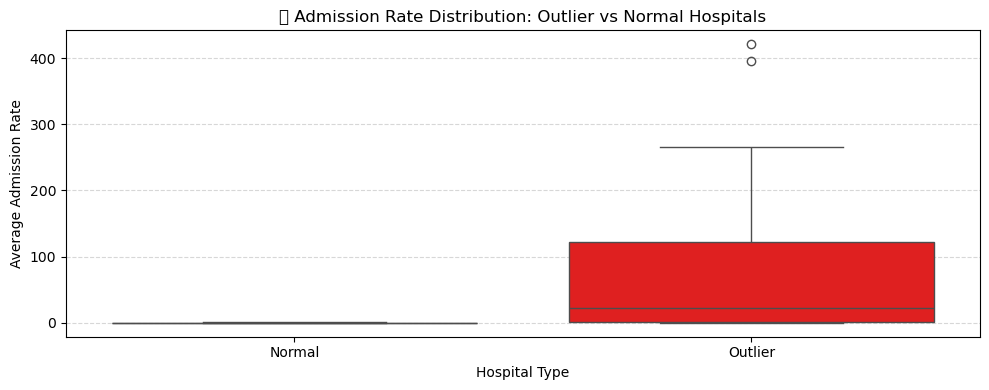

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Flag Hospital-Level Outliers ---
# You already did row-level detection using Outlier_Final
# Now, assign hospital-level outlier flag
hospital_outlier_summary = df_anomaly.groupby("Hospital_Standardized").agg({
    "Admission_Rate": ["mean", "std", "count"],
    "Outlier_Final": "any"  # True if hospital has any outlier
}).reset_index()

# --- Step 2: Clean column names ---
hospital_outlier_summary.columns = ["Hospital", "Mean_Admission_Rate", "Std_Admission_Rate", "Record_Count", "Outlier"]

# --- Step 3: Convert boolean to label for plotting ---
hospital_outlier_summary["Outlier"] = hospital_outlier_summary["Outlier"].map({True: "Outlier", False: "Normal"})

# --- Step 4: Plot Boxplot ---
plt.figure(figsize=(10, 4))
sns.boxplot(
    x="Outlier",
    y="Mean_Admission_Rate",
    data=hospital_outlier_summary,
    palette={"Outlier": "red", "Normal": "blue"}
)
plt.xlabel("Hospital Type")
plt.ylabel("Average Admission Rate")
plt.title("📊 Admission Rate Distribution: Outlier vs Normal Hospitals")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [149]:
from scipy.stats import ttest_ind

outlier_rates = hospital_outlier_summary[hospital_outlier_summary["Outlier"] == "Outlier"]["Mean_Admission_Rate"]
normal_rates = hospital_outlier_summary[hospital_outlier_summary["Outlier"] == "Normal"]["Mean_Admission_Rate"]

t_stat, p_value = ttest_ind(outlier_rates, normal_rates, equal_var=False)
print(f"T-test result: t-stat = {t_stat:.2f}, p-value = {p_value:.4f}")


T-test result: t-stat = 3.41, p-value = 0.0021


**Distribution of Admission Rate (with outlier threshold)**

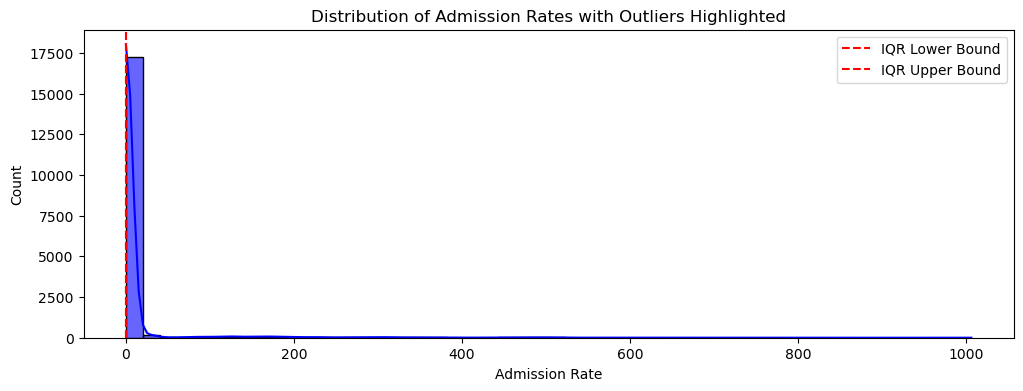

In [152]:
# Visualizing the Distribution
plt.figure(figsize=(12, 4))
sns.histplot(df_anomaly['Admission_Rate'], bins=50, kde=True, color='blue', alpha=0.6)
plt.axvline(lower_bound, color='red', linestyle='dashed', label='IQR Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='dashed', label='IQR Upper Bound')
plt.title("Distribution of Admission Rates with Outliers Highlighted")
plt.xlabel("Admission Rate")
plt.ylabel("Count")
plt.legend()
plt.show()

**Time Series of Outlier Hospitals**

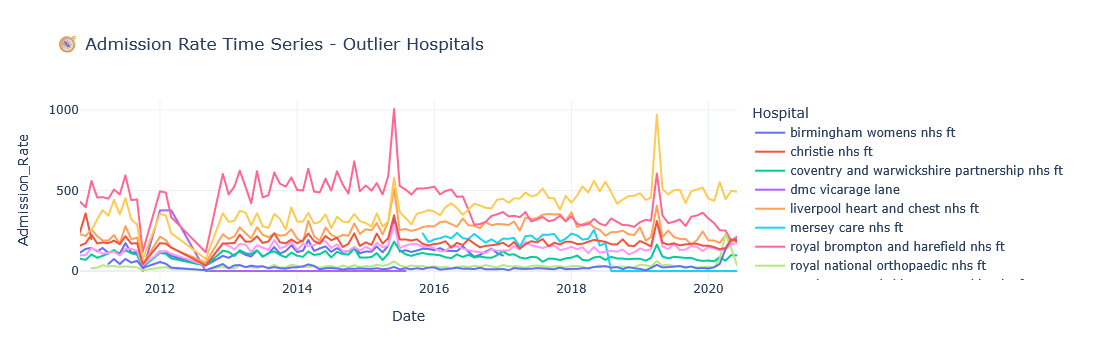

In [155]:
import plotly.express as px
import pandas as pd

# Create 'Date' column if not already created
df_agg['Date'] = pd.to_datetime(df_agg[['Year', 'Month']].assign(DAY=1))

# Select top outlier hospitals based on your anomaly counts
selected_outliers = anomalies_df['Hospital_Standardized'].unique()  # or limit to top N

# Filter data for only outlier hospitals
interactive_df = df_agg[df_agg['Hospital_Standardized'].isin(selected_outliers)]

# Plot interactive time series chart
fig = px.line(
    interactive_df,
    x="Date",
    y="Admission_Rate",
    color="Hospital_Standardized",
    title="🧭 Admission Rate Time Series - Outlier Hospitals"
)
fig.update_layout(legend_title="Hospital", template="plotly_white")
fig.show()


**Feature Trend Deep Dive for Top Outliers**

C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\3625897421.py:31: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



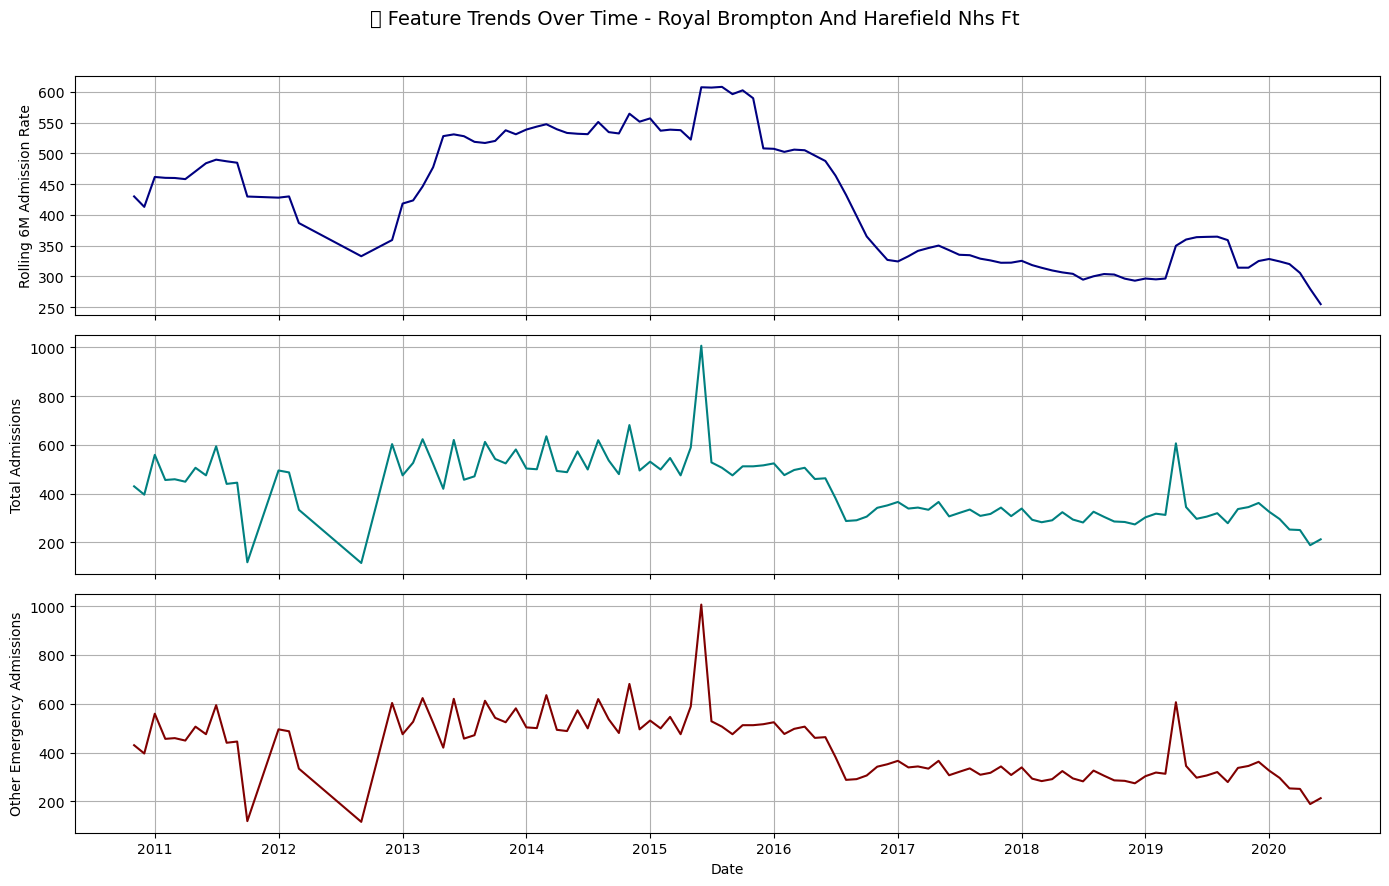

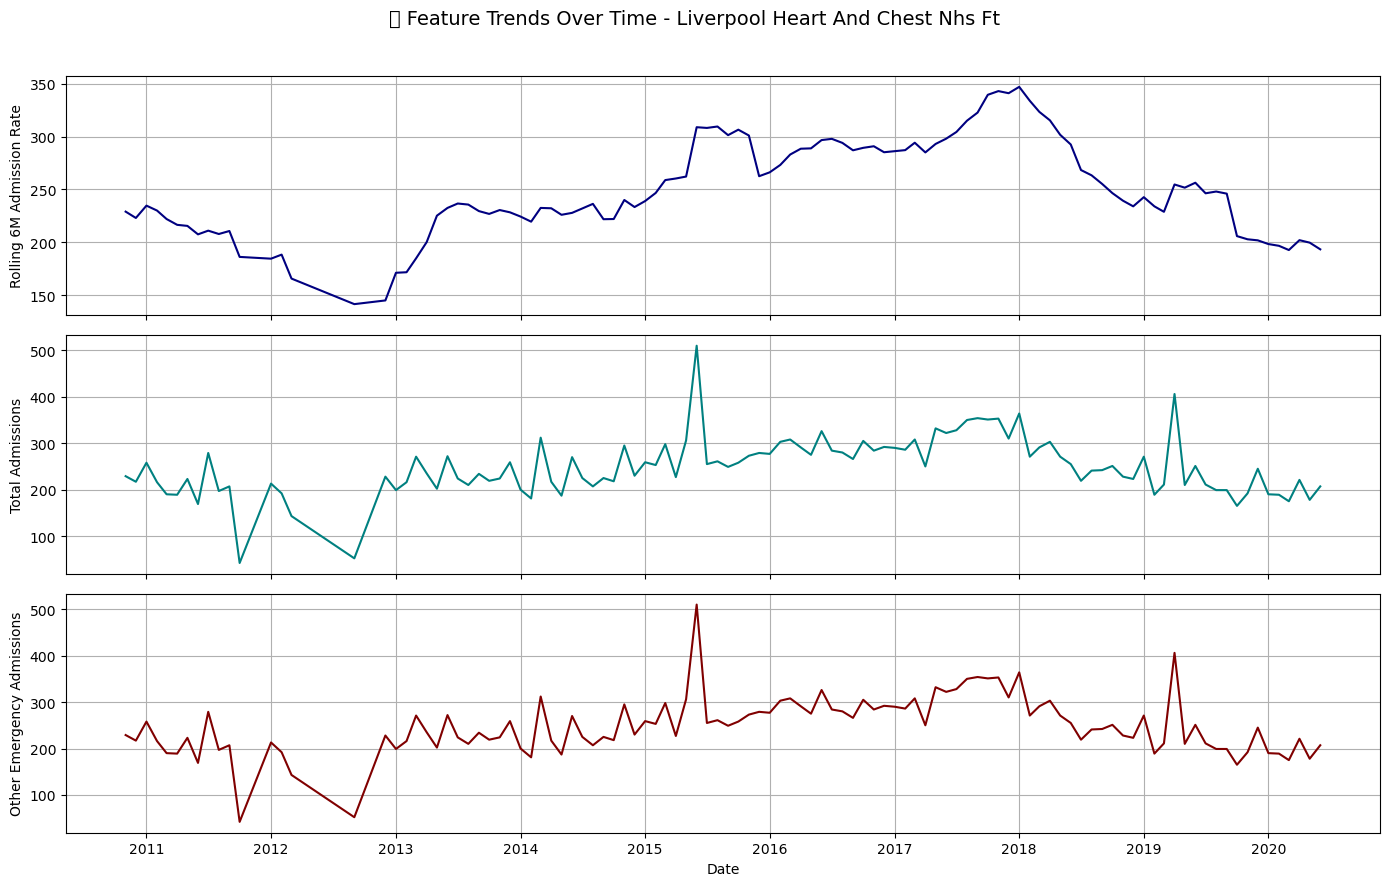

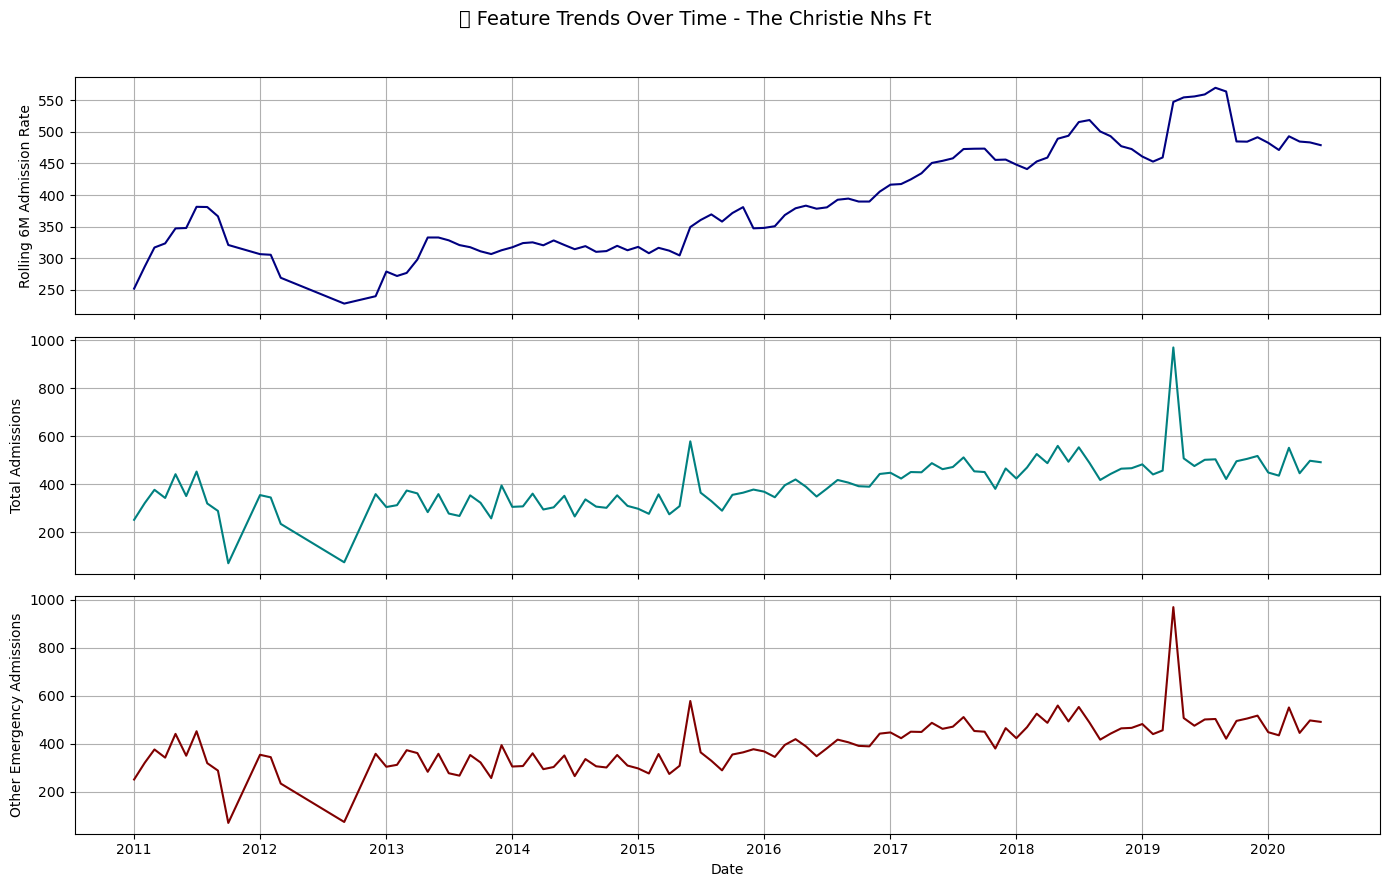

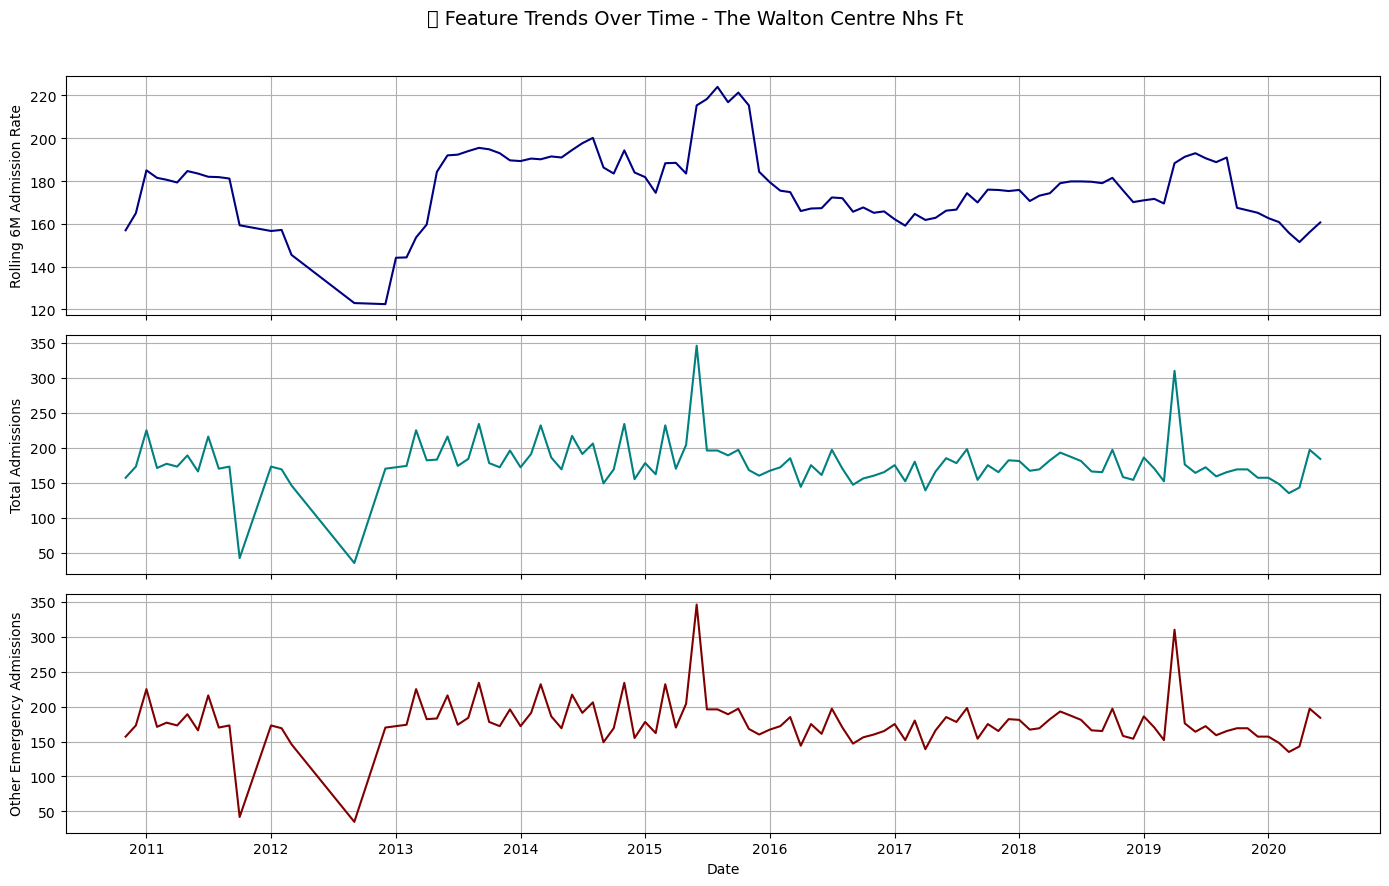

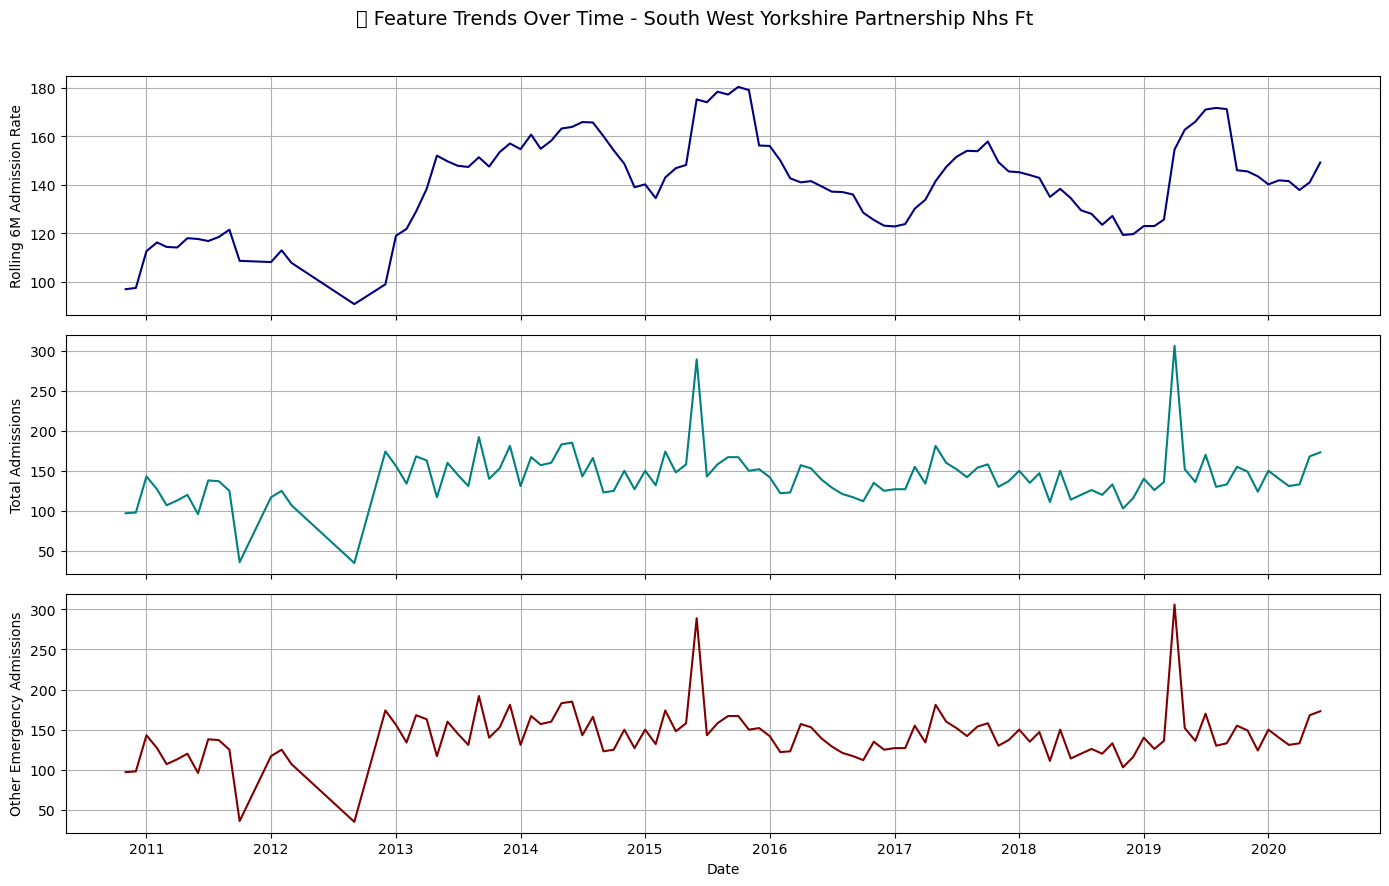

In [158]:
# Create Date column
df_anomaly["Date"] = pd.to_datetime(df_anomaly["Year"].astype(str) + "-" + df_anomaly["Month"].astype(str) + "-01")

# Filter anomalies for selected hospitals
top_hospitals = anomaly_counts["Hospital"].head(5).tolist()
df_top_anomalies = df_anomaly[df_anomaly["Hospital_Standardized"].isin(top_hospitals)]

# Plot
for hospital in top_hospitals:
    subset = df_top_anomalies[df_top_anomalies["Hospital_Standardized"] == hospital]
    
    fig, ax = plt.subplots(3, 1, figsize=(14, 9), sharex=True)
    fig.suptitle(f"🔍 Feature Trends Over Time - {hospital.title()}", fontsize=14)

    # Plot 1: Admission Rate Rolling 6
    ax[0].plot(subset["Date"], subset["Admission_Rate_Rolling6"], color='navy')
    ax[0].set_ylabel("Rolling 6M Admission Rate")
    ax[0].grid(True)

    # Plot 2: Total Admissions
    ax[1].plot(subset["Date"], subset["Total_Admissions"], color='teal')
    ax[1].set_ylabel("Total Admissions")
    ax[1].grid(True)

    # Plot 3: Other Emergency Admissions
    ax[2].plot(subset["Date"], subset["Other_Emergency_Admissions"], color='maroon')
    ax[2].set_ylabel("Other Emergency Admissions")
    ax[2].set_xlabel("Date")
    ax[2].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\3777274631.py:26: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.

C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.



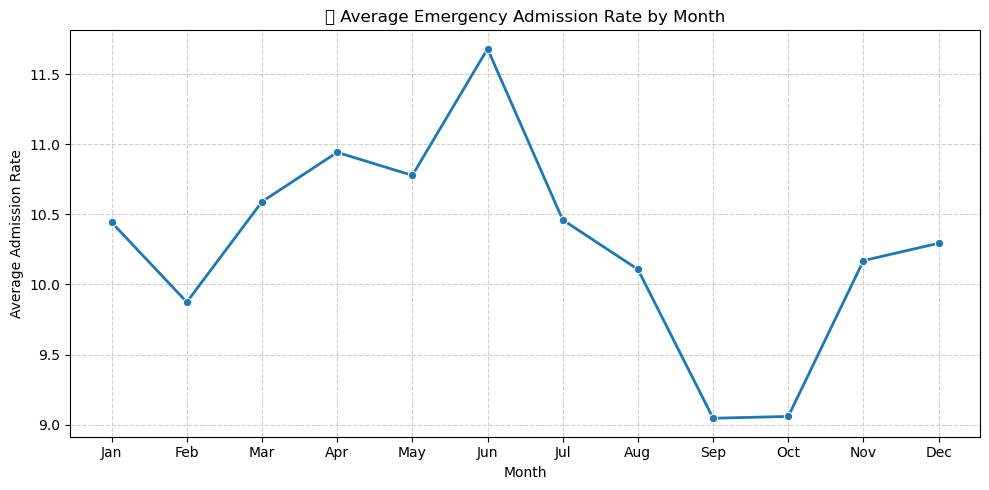

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure Date exists
df_agg['Date'] = pd.to_datetime(df_agg[['Year', 'Month']].assign(DAY=1))

# Extract month name for better labels (optional)
df_agg['Month_Name'] = df_agg['Date'].dt.strftime('%b')
df_agg['Month_Num'] = df_agg['Date'].dt.month  # for sorting

# Group by month across all years
monthly_avg = df_agg.groupby('Month_Num')['Admission_Rate'].mean().reset_index()
monthly_avg['Month_Name'] = monthly_avg['Month_Num'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Sort by calendar order
monthly_avg = monthly_avg.sort_values('Month_Num')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month_Name', y='Admission_Rate', marker='o', linewidth=2)
plt.title("📅 Average Emergency Admission Rate by Month")
plt.xlabel("Month")
plt.ylabel("Average Admission Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\1255729647.py:21: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



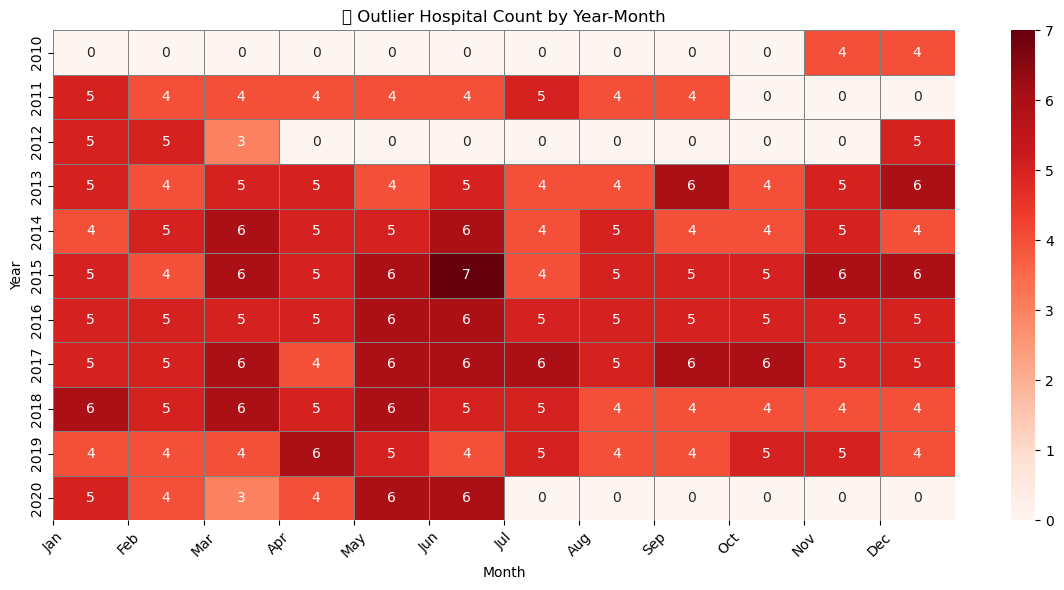

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Year' and 'Month' columns are present in your `anomalies_df`
# If not, extract them from a datetime column like so:
# anomalies_df['Year'] = anomalies_df['Date'].dt.year
# anomalies_df['Month'] = anomalies_df['Date'].dt.month

# Count outliers by Year and Month
heatmap_data = anomalies_df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor='gray', annot=True, fmt="d")
plt.title("🔥 Outlier Hospital Count by Year-Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.tight_layout()
plt.show()


**Final Forecasting Plot**

**Final Forecasting Plot (Compare Historical + Forecast)**

**Forecast admission rates per hospital With Uncertainty Bounds**

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

def forecast_admission_rates(
    df_agg, 
    scaler, 
    model, 
    months_to_forecast=6, 
    selected_hospitals=None, 
    uncertainty_margin=0.02
):
    """
    Forecast hospital admission rates using XGBoost optimized model.

    Parameters:
    - df_agg: Preprocessed aggregated dataframe
    - scaler: Scaler used in model training
    - model: Trained XGBoost optimized model
    - months_to_forecast: Number of months to forecast (default=6)
    - selected_hospitals: List of hospitals to plot (optional)
    - uncertainty_margin: ± margin for uncertainty bounds (default=2%)

    Returns:
    - df_future: DataFrame containing forecasted admission rates
    """
    future_rows = []

    for hospital in df_agg["Hospital_Standardized"].unique():
        hospital_df = df_agg[df_agg["Hospital_Standardized"] == hospital].sort_values("Date").copy()
        last_row = hospital_df.iloc[-1]

        for i in range(1, months_to_forecast + 1):
            future_date = last_row["Date"] + relativedelta(months=i)

            # Dynamic rolling average & lag handling
            rolling_attendance = hospital_df["Total_Attendances"].tail(6).mean()
            rolling_admissions = hospital_df["Total_Admissions"].tail(6).mean()
            rolling_other_emergency = hospital_df["Other_Emergency_Admissions"].tail(6).mean()
            rolling_admission_rate = hospital_df["Admission_Rate"].tail(6).mean()

            future_row = {
                "Hospital_Standardized": hospital,
                "Date": future_date,
                "Year": future_date.year,
                "Month": future_date.month,
                "Total_Attendances": rolling_attendance,
                "Total_Admissions": rolling_admissions,
                "Other_Emergency_Admissions": rolling_other_emergency,
                "Admission_Rate_Lag2": last_row["Admission_Rate_Lag1"],
                "Admission_Rate_Lag3": last_row["Admission_Rate_Lag2"],
                "Admission_Rate_Rolling6": rolling_admission_rate
            }
            future_rows.append(future_row)

    # Create forecast DataFrame
    df_future = pd.DataFrame(future_rows)

    # Predict future admission rates
    future_features = [
        "Total_Attendances", "Total_Admissions", "Other_Emergency_Admissions",
        "Admission_Rate_Lag2", "Admission_Rate_Lag3", "Admission_Rate_Rolling6"
    ]
    X_future = scaler.transform(df_future[future_features])
    df_future["Predicted_Admission_Rate"] = model.predict(X_future)

    # Add uncertainty
    df_future["Upper_Bound"] = df_future["Predicted_Admission_Rate"] + uncertainty_margin
    df_future["Lower_Bound"] = df_future["Predicted_Admission_Rate"] - uncertainty_margin

    # Combine historical + forecast for plotting
    df_combined = pd.concat([
        df_agg[["Date", "Hospital_Standardized", "Admission_Rate"]],
        df_future[["Date", "Hospital_Standardized", "Predicted_Admission_Rate"]]
    ], ignore_index=True)

    # Visualization
    if selected_hospitals:
        plt.figure(figsize=(12, 5))
        for hospital in selected_hospitals:
            hist = df_combined[
                (df_combined["Hospital_Standardized"] == hospital) &
                (df_combined["Admission_Rate"].notnull())
            ]
            fut = df_future[df_future["Hospital_Standardized"] == hospital]
            
            plt.plot(hist["Date"], hist["Admission_Rate"], label=f"{hospital.title()} - Historical", linewidth=2)
            plt.plot(fut["Date"], fut["Predicted_Admission_Rate"], linestyle="--", label=f"{hospital.title()} - Forecast (XGBoost)", linewidth=2)
            plt.fill_between(fut["Date"], fut["Lower_Bound"], fut["Upper_Bound"], alpha=0.2)

        plt.title("📈 XGBoost Forecast of Hospital Admission Rates with Uncertainty")
        plt.xlabel("Date")
        plt.ylabel("Admission Rate")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()

    return df_future


C:\Users\oguch\AppData\Local\Temp\ipykernel_14600\166194068.py:97: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\oguch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



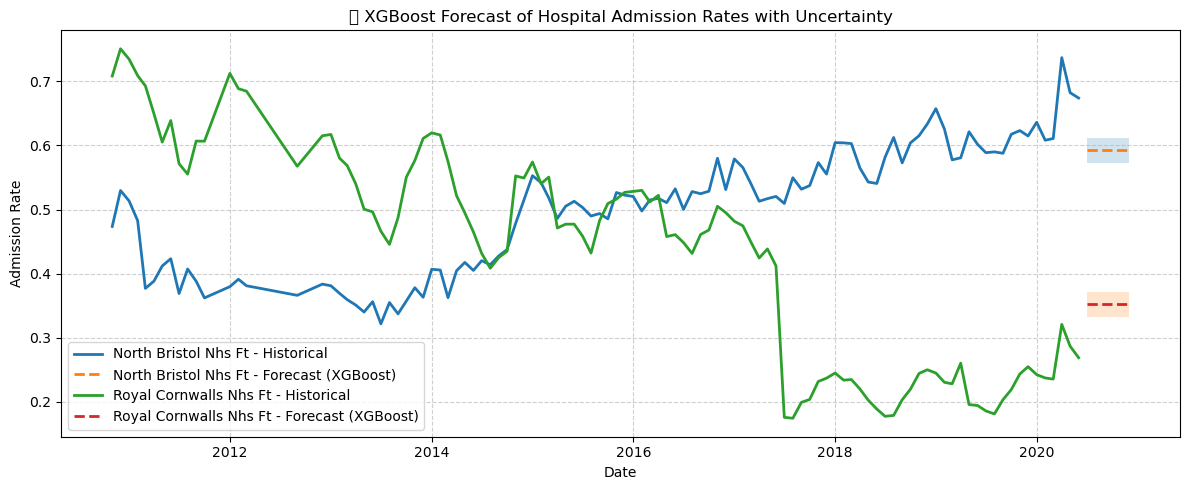

In [169]:
# Example usage
forecast_df = forecast_admission_rates(
    df_agg=df_agg,
    scaler=scaler,
    model=models["XGBoost (Optimized)"],
    months_to_forecast=6,
    selected_hospitals=["north bristol nhs ft", "royal cornwalls nhs ft"]
)


**Forecast admission rates per hospital With Uncertainty Bounds**

In [172]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from dateutil.relativedelta import relativedelta

def plot_xgboost_forecast_with_scenario(
    df_agg,
    xgb_model,
    scaler,
    hospital_name,
    forecast_start_date,
    future_features,
    months_to_forecast=6,
    uncertainty_pct=0.02,
    scenario_pct=0.10
):
    """
    Forecasts future admission rates using trained XGBoost model, 
    adds uncertainty bounds & scenario simulation, and plots.

    Parameters:
    - df_agg (DataFrame): Aggregated hospital data
    - xgb_model: Trained XGBoost model (Optimized)
    - scaler: Pre-fitted scaler used in model training
    - hospital_name (str): Hospital to forecast for
    - forecast_start_date (datetime): Start date for forecast
    - future_features (list): List of selected features used in model training
    - months_to_forecast (int): Number of future months to predict
    - uncertainty_pct (float): % range for uncertainty bound
    - scenario_pct (float): % increase for stress test scenario

    Returns:
    - Plotly figure
    """

    # Filter hospital data
    df_hosp = df_agg[df_agg["Hospital_Standardized"] == hospital_name].copy()
    df_hosp["Date"] = pd.to_datetime(df_hosp[["Year", "Month"]].assign(DAY=1))

    # Split historical & future
    df_past = df_hosp[df_hosp["Date"] < forecast_start_date]
    latest = df_past.sort_values("Date").iloc[-1]

    # --- Prepare future data ---
    future_rows = []
    for i in range(1, months_to_forecast + 1):
        future_date = latest["Date"] + relativedelta(months=i)
        row = {
            "Hospital_Standardized": hospital_name,
            "Date": future_date,
            "Year": future_date.year,
            "Month": future_date.month,
            "Total_Attendances": latest["Total_Attendances"],
            "Total_Admissions": latest["Total_Admissions"],
            "Other_Emergency_Admissions": latest["Other_Emergency_Admissions"],
            "Admission_Rate_Lag2": latest["Admission_Rate_Lag2"],
            "Admission_Rate_Lag3": latest["Admission_Rate_Lag3"],
            "Admission_Rate_Rolling6": latest["Admission_Rate_Rolling6"]
        }
        future_rows.append(row)

    df_future = pd.DataFrame(future_rows)

    # --- Predict Future Admission Rates ---
    X_future = scaler.transform(df_future[future_features])
    df_future["Predicted_Admission_Rate"] = xgb_model.predict(X_future)

    # Add uncertainty bounds & scenario simulation
    df_future["Upper_Bound"] = df_future["Predicted_Admission_Rate"] * (1 + uncertainty_pct)
    df_future["Lower_Bound"] = df_future["Predicted_Admission_Rate"] * (1 - uncertainty_pct)
    df_future["Sim_Admission_Rate"] = df_future["Predicted_Admission_Rate"] * (1 + scenario_pct)

    # --- Plot ---
    fig = go.Figure()

    # Historical Trend
    fig.add_trace(go.Scatter(
        x=df_past["Date"],
        y=df_past["Admission_Rate"],
        mode="lines+markers",
        name="Historical Admission Rate",
        line=dict(color="blue")
    ))

    # Forecast Line
    fig.add_trace(go.Scatter(
        x=df_future["Date"],
        y=df_future["Predicted_Admission_Rate"],
        mode="lines+markers",
        name="Forecasted Admission Rate (XGBoost)",
        line=dict(color="green")
    ))

    # Uncertainty Bound
    fig.add_trace(go.Scatter(
        x=pd.concat([df_future["Date"], df_future["Date"][::-1]]),
        y=pd.concat([df_future["Upper_Bound"], df_future["Lower_Bound"][::-1]]),
        fill='toself',
        fillcolor='rgba(0, 200, 0, 0.1)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=True,
        name="Uncertainty Bound"
    ))

    # What-If Scenario
    fig.add_trace(go.Scatter(
        x=df_future["Date"],
        y=df_future["Sim_Admission_Rate"],
        mode="lines+markers",
        name="What-If Scenario (+10% Attendances)",
        line=dict(color="orange", dash="dash")
    ))

    # Forecast Start Marker
    fig.add_trace(go.Scatter(
        x=[forecast_start_date, forecast_start_date],
        y=[0, 1],
        mode="lines",
        line=dict(color="red", dash="dash"),
        name="Forecast Start"
    ))

    # Layout
    fig.update_layout(
        title=f"📈 Forecasted Emergency Admission Rates - {hospital_name.title()} (XGBoost, with Uncertainty & Simulation)",
        xaxis_title="Date",
        yaxis_title="Admission Rate",
        hovermode="x unified",
        height=650
    )

    fig.show()

    return df_future  # Optional: return forecast data for further use


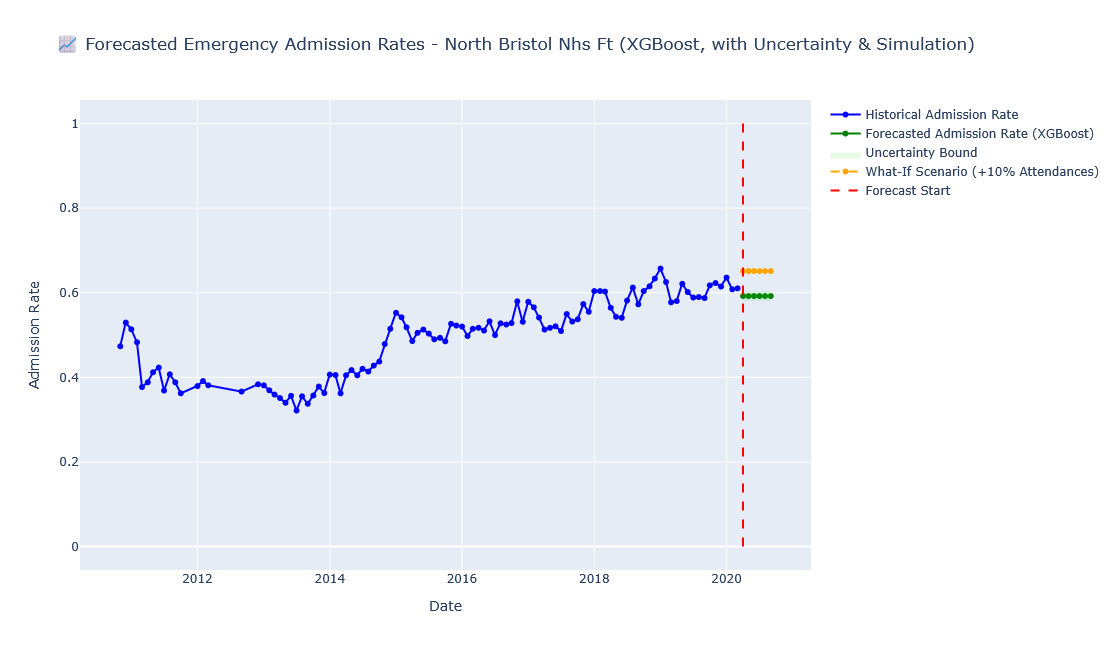

In [174]:
forecast_start = pd.to_datetime("2020-04-01")

df_forecast = plot_xgboost_forecast_with_scenario(
    df_agg=df_agg,
    xgb_model=models["XGBoost (Optimized)"],  # ✅ Correct model reference
    scaler=scaler,
    hospital_name="north bristol nhs ft",
    forecast_start_date=forecast_start,
    future_features=[
        "Total_Attendances", "Total_Admissions", "Other_Emergency_Admissions",
        "Admission_Rate_Lag2", "Admission_Rate_Lag3", "Admission_Rate_Rolling6"
    ]
)


In [176]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from dateutil.relativedelta import relativedelta

def forecast_xgboost_multi_hospitals(
    df_agg, 
    xgb_model, 
    scaler, 
    hospital_list, 
    forecast_start_date, 
    future_features,
    months_to_forecast=6,
    uncertainty_pct=0.02,
    scenario_pct=0.10
):
    """
    Multi-Hospital Forecast Function using Optimized XGBoost Model
    
    Parameters:
        df_agg (DataFrame): Aggregated historical dataset
        xgb_model (Model): Trained & optimized XGBoost model
        scaler (Scaler): Fitted StandardScaler used in training
        hospital_list (list): List of hospital names to forecast
        forecast_start_date (datetime): Forecast start date
        future_features (list): Selected optimized input features (6 features)
        months_to_forecast (int): Number of months to predict
        uncertainty_pct (float): Percentage uncertainty for confidence bounds
        scenario_pct (float): Percentage increase for what-if scenario

    Returns:
        df_forecast_panel (DataFrame): Forecasted panel data with bounds & scenario
        fig (Plotly Figure): Interactive forecast plot
    """
    panel_data = []

    for hospital in hospital_list:
        # Get latest historical row
        latest = df_agg[df_agg['Hospital_Standardized'] == hospital].sort_values('Date').iloc[-1]

        # Create future rows
        future_rows = []
        for i in range(1, months_to_forecast + 1):
            future_date = latest["Date"] + relativedelta(months=i)
            row = {
                "Hospital_Standardized": hospital,
                "Date": future_date,
                "Year": future_date.year,
                "Month": future_date.month
            }
            # Use latest known feature values
            for col in future_features:
                row[col] = latest[col]
            future_rows.append(row)

        df_future = pd.DataFrame(future_rows)

        # Scale & Predict (✅ Corrected)
        X_future = scaler.transform(df_future[future_features])
        df_future["Forecast_Admission_Rate"] = xgb_model.predict(X_future, validate_features=False)

        # Uncertainty bounds
        df_future["Upper_Bound"] = df_future["Forecast_Admission_Rate"] * (1 + uncertainty_pct)
        df_future["Lower_Bound"] = df_future["Forecast_Admission_Rate"] * (1 - uncertainty_pct)

        # What-If Scenario
        df_future["Scenario_Admission_Rate"] = df_future["Forecast_Admission_Rate"] * (1 + scenario_pct)

        panel_data.append(df_future)

    # Combine all hospital forecasts
    df_forecast_panel = pd.concat(panel_data)

    # ===== Interactive Plot =====
    fig = go.Figure()

    for hospital in hospital_list:
        df_hosp = df_forecast_panel[df_forecast_panel['Hospital_Standardized'] == hospital]

        # Forecast Line
        fig.add_trace(go.Scatter(
            x=df_hosp['Date'],
            y=df_hosp['Forecast_Admission_Rate'],
            mode='lines+markers',
            name=f"{hospital.title()} - Forecast",
            line=dict(dash='solid')
        ))

        # Uncertainty Bound
        fig.add_trace(go.Scatter(
            x=pd.concat([df_hosp["Date"], df_hosp["Date"][::-1]]),
            y=pd.concat([df_hosp["Upper_Bound"], df_hosp["Lower_Bound"][::-1]]),
            fill='toself',
            fillcolor='rgba(0, 200, 0, 0.1)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
            showlegend=False
        ))

        # Scenario Line
        fig.add_trace(go.Scatter(
            x=df_hosp["Date"],
            y=df_hosp["Scenario_Admission_Rate"],
            mode="lines+markers",
            name=f"{hospital.title()} - What-If Scenario (+10%)",
            line=dict(color="orange", dash="dash")
        ))

    # Forecast Start Marker
    fig.add_trace(go.Scatter(
        x=[forecast_start_date, forecast_start_date],
        y=[0, 1],
        mode="lines",
        line=dict(color="red", dash="dash"),
        name="Forecast Start"
    ))

    fig.update_layout(
        title="📊 Multi-Hospital Emergency Admission Rate Forecast (XGBoost, Uncertainty & Scenario)",
        xaxis_title="Date",
        yaxis_title="Admission Rate",
        hovermode="x unified",
        height=700,
        template="plotly_white"
    )

    return df_forecast_panel, fig


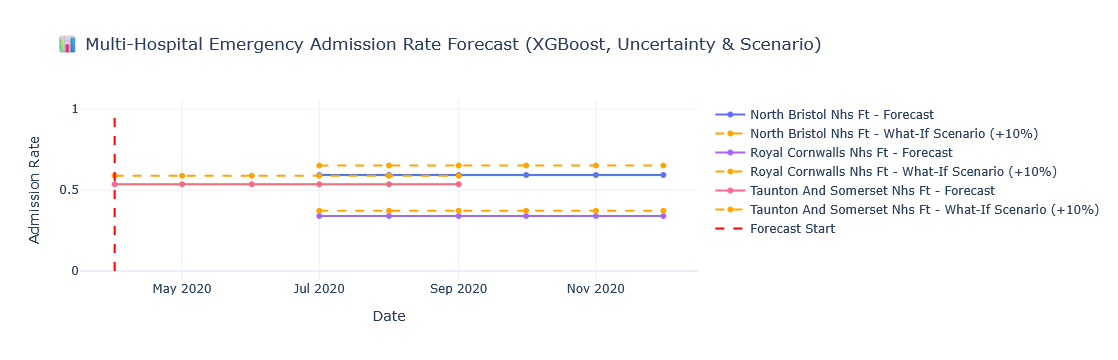

In [178]:
forecast_start = pd.to_datetime("2020-04-01")

df_forecast_panel, fig = forecast_xgboost_multi_hospitals(
    df_agg=df_agg,
    xgb_model=models["XGBoost (Optimized)"],  # ✅ Use your actual trained model
    scaler=scaler,
    hospital_list=["north bristol nhs ft", "royal cornwalls nhs ft", "taunton and somerset nhs ft"],
    forecast_start_date=forecast_start,
    future_features=[
        "Total_Attendances", "Total_Admissions", "Other_Emergency_Admissions",
        "Admission_Rate_Lag2", "Admission_Rate_Lag3", "Admission_Rate_Rolling6"
    ],
    months_to_forecast=6,
    uncertainty_pct=0.02,
    scenario_pct=0.10
)

fig.show()


In [180]:
import joblib

# Save the trained XGBoost model
joblib.dump(models["XGBoost (Optimized)"], "xgb_optimized_model.pkl")

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [182]:
import joblib

# Save the XGBoost Optimized Model
joblib.dump(models["XGBoost (Optimized)"], "xgb_optimized_model.pkl")


['xgb_optimized_model.pkl']